# CIS 545 Final Project [Group 72]
Aaron Schnall, John Gallagher, Chinedu Okoroafor

# **Motivation**

Airbnb is one of the hottest vacation rental platforms available today with over 6 million active listings on the platform. We have acquired data from 10 major cities across the world and will be utilizing it to do analysis into a variety of interesting questions, such as breaking down which amenities are the most common and predictive of price and rating, diving deep into the data on Superhosts vs. non-Superhosts, determining which features correlate the most with price and rating, and breaking down the data by geographic location.  In addition to our EDA, we will build multiple models in order to predict the price for listings, average rating for listings, and to classify a host as a Superhost or a non-Superhost using the models and techniques taught in class such as Linear Regression, Elastic Net Regression, Random Forest Regression, Random Forest Classification, hyperparameter tuning, Gradient Boosting, and Principal Component Analysis.

\

In order to do our analysis, we will be using two datasets. The primary dataset is a dataset of Airbnb listings and reviews, with data from 10 major cities, ~30 attributes, and over 270,000 unique listings. The second is population data from worldpopulationreview.com on the population sizes of major cities across the globe. This second dataset will be used primarily to get population data on the cities we are analyzing so we can explore the relationship between the population density of the city and the prices and ratings in that city. Through our analysis and modeling, we hope to gain new insight into the breakdown of Airbnb listings by price, rating, and host, as well as determine which features most positively correlate with price and a positive customer experience. 

# **Imports**

In [ ]:
# Installations
!pip install sqlalchemy==1.4.46
!pip install pandasql
!pip install gdown
!pip install recordlinkage
!pip install simphile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.9
    Uninstalling SQLAlchemy-2.0.9:
      Successfully uninstalled SQLAlchemy-2.0.9
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=17a904ac5fb0d1752f165be9c88588e1be265f71a4dad93b035e2393aaace952
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# General Imports
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pandasql as ps
import numpy as np
from ast import literal_eval
import recordlinkage
import difflib as dl
from simphile import jaccard_similarity
from pandasql import sqldf 
import random as random
import plotly.express as px
from wordcloud import WordCloud

# sklearn imports
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer



# **Airbnb Listing Data**

## Data Loading and Pre-Processing

[Link To Data on Kaggle](https://www.kaggle.com/datasets/mysarahmadbhat/airbnb-listings-reviews)

We are going to first import the Airbnb data into a dataframe that we can work with and manipulate. This data is very rich, having over 270,000 rows of Airbnb listings and many features to work with, including, but not limited to, ratings, host response time, price, and location. The listings span across 10 major cities across the globe including New York, Paris, Rome, and Mexico City. 

In [ ]:
# Downloading data
!gdown 'https://drive.google.com/uc?export=download&id=1eRiqWdvjTB2Gt3hDufY_Ue6hC1j9nPPx'

Downloading...
From: https://drive.google.com/uc?export=download&id=1eRiqWdvjTB2Gt3hDufY_Ue6hC1j9nPPx
To: /content/Listings.csv
100% 158M/158M [00:02<00:00, 77.7MB/s]


Now that we have imported the data, we can go ahead and take a look at a subset of the data to gain a better understanding of the format and features we'll be working with. Additionally, we can take a look at the datatypes of each column. Often times, datatypes need to be altered, so doing this early can help ensure we know what we may need to change for our purposes.

In [ ]:
# Read data into a new dataframe
listings_df = pd.read_csv('/content/Listings.csv', encoding='latin1')

# Take a look at the first 5 rows
listings_df.head(5)

<ipython-input-4-d8f159b0644c>:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_df = pd.read_csv('/content/Listings.csv', encoding='latin1')


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
# take a look at the info of the data to better understand features and length of dataset
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

Let's go ahead and convert types early on based on what we assume we'll need. We can always go back and alter more column types if we need to.


In [ ]:
#Dictionary for columns to convert
convert_dict = {'listing_id': int,
                'name': str,
                'host_location': str,
                'neighbourhood': str,
                'district': str,
                'property_type': str}
                
#Updating dataframe with conversions
listings_df = listings_df.astype(convert_dict)

One thing we're noticing is that the amenities column is currently stored as an object, so parsing through that will be impossible unless we convert it somehow. We'll go ahead and do that.

In [ ]:
#Perform literal eval on amenities
listings_df['amenities'] = listings_df['amenities'].apply(lambda row: literal_eval(row))

As we can see, we are now able to index the array values within the column of the dataframe, allowing us to do our amenity analysis

In [ ]:
#Make sure it worked
listings_df.amenities[0][0]

'Heating'

We will need to clean up some of the host data as well. Knowing that some of these features will be used for our future classification and regression tasks, we want to convert certian rows that take on 't' and 'f' values to have binary 0,1 integer results. 

In [ ]:
# Change t/f binary values to 0/1 integer values
listings_df['host_has_profile_pic'] = listings_df['host_has_profile_pic'].apply(lambda x : 1 if x == 't' else 0)
listings_df['host_is_superhost'] = listings_df['host_is_superhost'].apply(lambda x : 1 if x == 't' else 0)
listings_df['host_identity_verified'] = listings_df['host_identity_verified'].apply(lambda x : 1 if x == 't' else 0)
listings_df['instant_bookable'] = listings_df['instant_bookable'].apply(lambda x : 1 if x == 't' else 0)

listings_df = listings_df.astype({'host_has_profile_pic': int, 'host_is_superhost': int,
                            'host_identity_verified': int, 'instant_bookable': int})


Additionally, we'll create a new column called 'days_as_host' from the given column 'host_since' in order to quantify how long someone has been a host. We decided to use April 1, 2023 as our present day cut-off for computing the 'days_as_host' value. This metric will likely be much more useful to us in later modeling tasks than the 'host_since' column, which is just a date indicating when the host began listing properties on Airbnb.

In [ ]:
#Convert host_since to datetime
listings_df['host_since'] = pd.to_datetime(listings_df['host_since'], format='%Y-%m-%d')

# Function to translate compute number of days between 'host_since' date and '4/1/2023'
def days_as_host(date):
    date_present = pd.Timestamp('2023-04-01')
    return (date_present - date).days

#Create column 'days_as_host' as an int type by applying function above to 'host_since' column
listings_df['days_as_host'] = listings_df['host_since'].apply(lambda x: days_as_host(x))
listings_df = listings_df[listings_df['days_as_host'].notna()]
listings_df = listings_df.astype({"days_as_host": int})


We know the price of each listing is in the local currency of the listing, so we will convert all prices to USD using current currency exchanges rates sourced from [Oanda](https://www.oanda.com/currency-converter/en/?from=ZAR&to=USD&amount=1). In addition, we remove all rows that have price of 0, as these won't be very helpful for our modeling.

In [ ]:
# Store exchange rate for each currency with USD in dictionary - sourced from Oanda
currency_dict = {
    'New York': 1,
    'Paris': 1.09341,
    'Rio de Janeiro': 0.19756,
    'Bangkok': 0.02944,
    'Sydney': 0.67224,
    'Istanbul': 0.05194,
    'Rome': 1.09341,
    'Hong Kong': 0.12739,
    'Mexico City': 0.05489,
    'Cape Town': 0.05565
}

# Define function to use for converting currencies
def convert_currency(x):
  conversion = currency_dict.get(x['city'])
  return conversion*x['price']

# update price column of our df with the converted currency price
listings_df['price'] = listings_df.apply(convert_currency, axis=1)

# Remove rows where price is 0
listings_df = listings_df[listings_df['price'] > 0]

In [ ]:
listings_df.dtypes

listing_id                              int64
name                                   object
host_id                                 int64
host_since                     datetime64[ns]
host_location                          object
host_response_time                     object
host_response_rate                    float64
host_acceptance_rate                  float64
host_is_superhost                       int64
host_total_listings_count             float64
host_has_profile_pic                    int64
host_identity_verified                  int64
neighbourhood                          object
district                               object
city                                   object
latitude                              float64
longitude                             float64
property_type                          object
room_type                              object
accommodates                            int64
bedrooms                              float64
amenities                         

We next want to get a sense of how many NA rows our data contains in the columns we intend to predict in future modeling sections (price and rating). It appears we have price data for every listing in the dataset but are missing data on ratings for roughly one-third of the dataset. Fortunately, this dataset is large enough that we will still have 180,000+ datapoints to use to predict rating scores even with all of the missing data. We will take steps in the upcoming modeling sections to address potential problems caused by NA values in our feature columns.

In [ ]:
# We look at how many columns have na values for price and rating since these are the columns we are most interested in analyzing 
price_na = listings_df['price'].isna().sum()
review_na = listings_df['review_scores_rating'].isna().sum()

# print out how many na values are in columns of interest
print(f'The price column has {price_na} NA values.')
print(f'The review scores rating column has {review_na} NA values.')

The price column has 0 NA values.
The review scores rating column has 91235 NA values.


# **Population Density Data**

## Data Loading and Pre-Processing

[Link To Data on World Population Review](https://www.kaggle.com/code/valchovalev/population-density-by-city-2021)

Another part of our exploratory data analysis will be to understand if there is a link between population density and pricing. As far as the population, we had to sanity check some of the information and make a few corrections. For example,Paris in this dataset is listed as having 11 million people, which we found to be incorrect based on external data. As a result, we went ahead and made the correction manually.

In [ ]:
#Downloading more Drive data
!gdown 'https://drive.google.com/uc?export=download&id=1vgHBLx_Kqzmz2mRaopQdrzqsBmEnmFG_'

Downloading...
From: https://drive.google.com/uc?export=download&id=1vgHBLx_Kqzmz2mRaopQdrzqsBmEnmFG_
To: /content/population_data.csv
100% 39.9k/39.9k [00:00<00:00, 44.1MB/s]


In [ ]:
# Read data into a new dataframe - Note: did usecols because there was a column with erroneous values but no header, causing the read to fail
cities_pop_df = pd.read_csv('/content/population_data.csv', usecols = ['pop2023','pop2022','city','country','growthRate','type','rank'])

# Take a look at the first 5 rows
cities_pop_df.head()

,pop2023,pop2022,city,country,growthRate,type,rank
0,37194104,37274000,Tokyo,Japan,-0.0021,w,1
1,32941308,32065760,Delhi,India,0.0273,w,2
2,29210808,28516904,Shanghai,China,0.0243,w,3
3,23209616,22478116,Dhaka,Bangladesh,0.0325,w,4
4,22619736,22429800,Sao Paulo,Brazil,0.0085,w,5


Ok, we've successfully imported our population density data now, so we'll go ahead and select the cities we want.

In [ ]:
#Keeping only the cities we want
list_of_cities = ['New York City','Paris','Rio de Janeiro','Bangkok','Sydney','Istanbul','Rome','Hong Kong','Mexico City','Cape Town']
cities_pop_df = cities_pop_df[cities_pop_df['city'].isin(list_of_cities)]
cities_pop_df.drop(columns= ['pop2022','country','type','rank'],inplace = True)

#Reindex and rename columns
cities_pop_df = cities_pop_df.reindex(columns=['city','pop2023','growthRate'])
cities_pop_df = cities_pop_df.rename({'pop2023':'population'},axis='columns')

#Correcting Paris Value
cities_pop_df['population'] = cities_pop_df['population'].replace(11208440, 2161000)

#Changing "New York City" entry to "New York" for joining
cities_pop_df['city'] = cities_pop_df['city'].replace('New York City', 'New York')

In [ ]:
#Visualizing cities_pop_df
cities_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 5 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        10 non-null     object 
 1   population  10 non-null     int64  
 2   growthRate  10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 320.0+ bytes


Next, we need to add a population density information since we currently only have population totals. We'll do this by creating a dictionary of land areas and then implementing a function to create a population density column

In [ ]:
#Create a dictionary of land area in sq. km.
land_area_dict = {
    'New York': 783.8,
    'Paris': 105.4,
    'Rio de Janeiro': 1200,
    'Bangkok': 1570,
    'Sydney': 12370,
    'Istanbul': 5343,
    'Rome': 1290,
    'Hong Kong': 1110,
    'Mexico City': 1490,
    'Cape Town': 2450
}

#Create a function to get population density
def get_pop_density(x):
  conversion = land_area_dict.get(x['city'])
  return x['population']/conversion

#Add population density column
cities_pop_df['pop_density'] = cities_pop_df.apply(get_pop_density, axis=1).round(2)
cities_pop_df

,city,population,growthRate,pop_density
5,Mexico City,22281442,0.0089,14953.99
14,Istanbul,15847768,0.0135,2966.08
21,Rio de Janeiro,13727720,0.0069,11439.77
28,Paris,2161000,0.0059,20502.85
30,Bangkok,11069982,0.0156,7050.94
47,New York,7888121,-0.0348,10063.95
50,Hong Kong,7684801,0.0054,6923.24
81,Sydney,5120894,0.0127,413.98
84,Cape Town,4890280,0.0186,1996.03
99,Rome,4315671,0.0041,3345.48


Now let's combine our listings info with our population info. 

In [ ]:
#Join Dataframes
listings_pop_df = pd.merge(listings_df,cities_pop_df,how = "inner",on = 'city')

We can briefly visualize these results as well.

In [ ]:
#Let's visualize
listings_pop_df.head(5)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,days_as_host,population,growthRate,pop_density
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,0,1.0,...,10.0,10.0,10.0,10.0,10.0,0,4137,2161000,0.0059,20502.85
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,0,1.0,...,10.0,10.0,10.0,10.0,10.0,0,3410,2161000,0.0059,20502.85
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,0,1.0,...,10.0,10.0,10.0,10.0,10.0,0,3166,2161000,0.0059,20502.85
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,0,1.0,...,10.0,10.0,10.0,10.0,10.0,0,3392,2161000,0.0059,20502.85
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,0,1.0,...,10.0,10.0,10.0,10.0,10.0,0,3030,2161000,0.0059,20502.85


We've reached the end of our data loading and pre-processing segment of this project. We've cleaned up our data, made conversions, instantiated new columns, and performed merges as needed. This was all done in an effort to simplify the next portions of our project, the Exploratory Data Analysis (EDA) and the Modeling of our data. The one exception is our amenities. These are a little more complicated, and we'll be visualizing this particular subset of the data as we work through some augmentation, so we'll keep this whole section in EDA, even though it's really both that and pre-processing. Let's get into that now.

# **Exploratory Data Analysis**

## Feature Analysis

### Correlation Between Features

We start out by taking a quick look at how our features may relate to each other. We create a heatmap that shows the correlation between all of the different features in our dataset. Many features will not relate to each other, however, we see a few features that are unsurprisingly correlated. For instances, there is a strong correlation between between each of the review categories. Among the review categories, it appears the overall rating for an Airbnb is most strongly correlated with value and least strongly correlated with location. This is an interesting initial finding that we intend to drill deeper into. Additionally, we see number of bedrooms and number of people the Airbnb accomodates are highly correlated. This makes sense and is something we'll look to address when performing PCA in our modeling section.

<ipython-input-21-f66d9b181790>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = listings_df.corr()


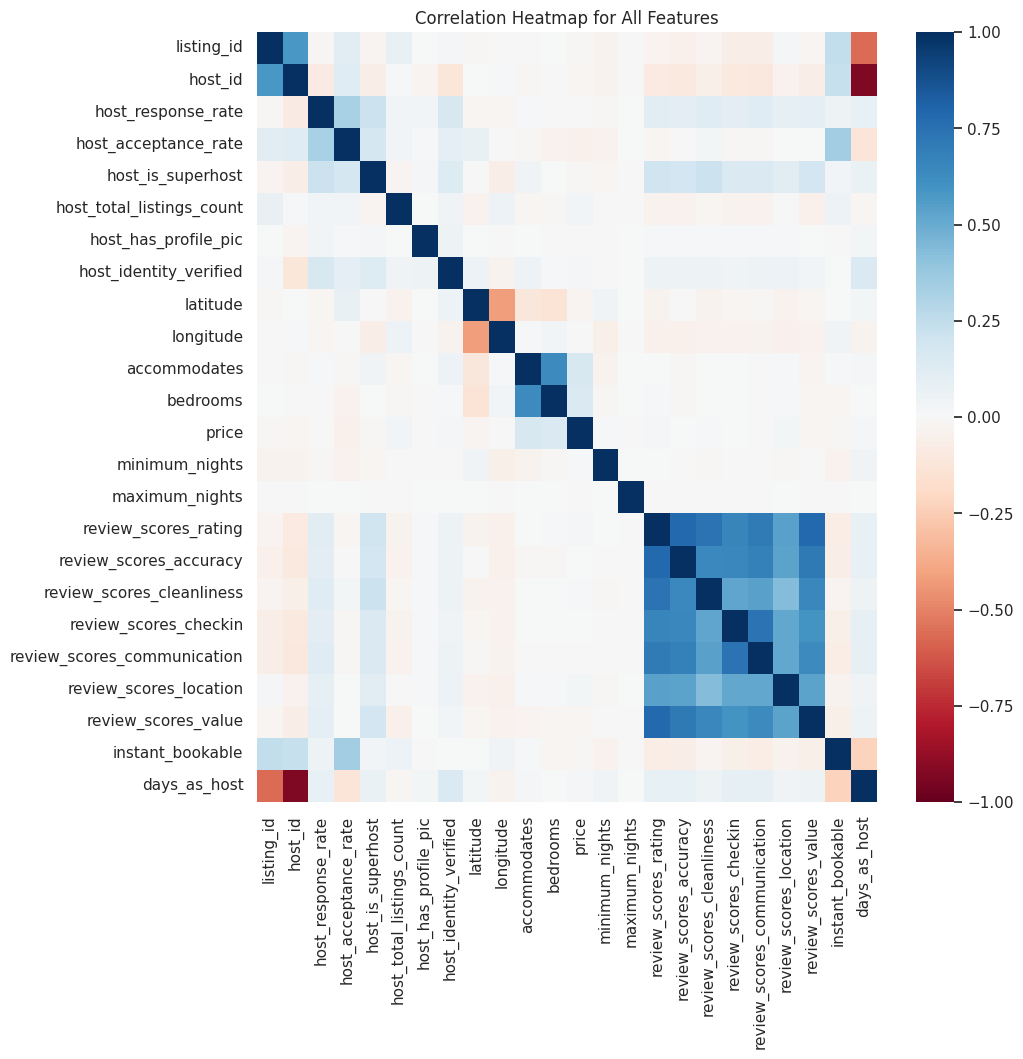

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
corr_mat = listings_df.corr()
heat_map = sns.heatmap(corr_mat, cmap='RdBu', vmin= -1, vmax = 1)
heat_map.set(title='Correlation Heatmap for All Features')
heat_map = heat_map

Based on our correlation matrix, it seems as though we can drop some features, including pool or gym, and some of the review_scores subsections.

## Amenity Analysis

We're going to now take a look at the amenity information. This information is contained within lists in the amenities column, so in an effort to determine the best way to break these items out and eventually rejoin them, we will intiially only worry about amenities, and drop all of the other columns in our starting analysis and data exploration.

####Distribution Before Transformations

Let's first look at the distribution of the amount of amenities.

In [ ]:
#Create a total column in a newly saved df
total_amenities = listings_df
total_amenities['total'] = total_amenities.apply(lambda row: len(row['amenities']),axis=1)

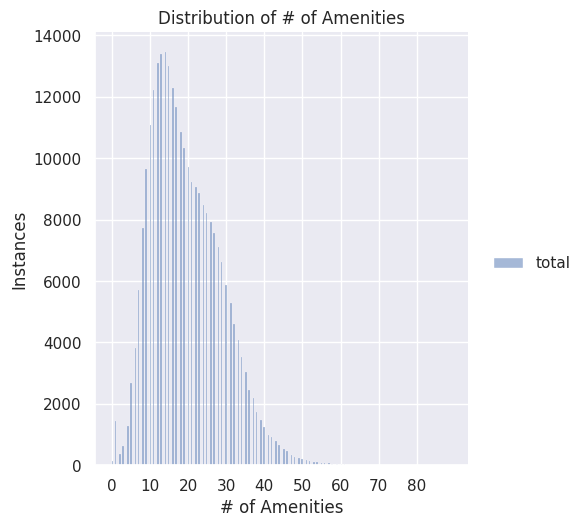

In [ ]:
#Plot for distro of amenities vs 
a_plot = sns.displot(data=total_amenities[['total']])
a_plot.set(title='Distribution of # of Amenities', xlabel='# of Amenities', ylabel='Instances')
plt.xticks([0,10,20,30,40,50,60,70,80])
plt.show()

Ok, so we can see that the average number of amenities is somewhere around 15. We won't be using all of the available amenities for our modeling, as our later EDA will show that there are over 3000 to choose from, so we'll use the most common number of 15. Later we'll go into this more and our selection criteria for these.

Let's see if the number of amenities has any link to price or rating.

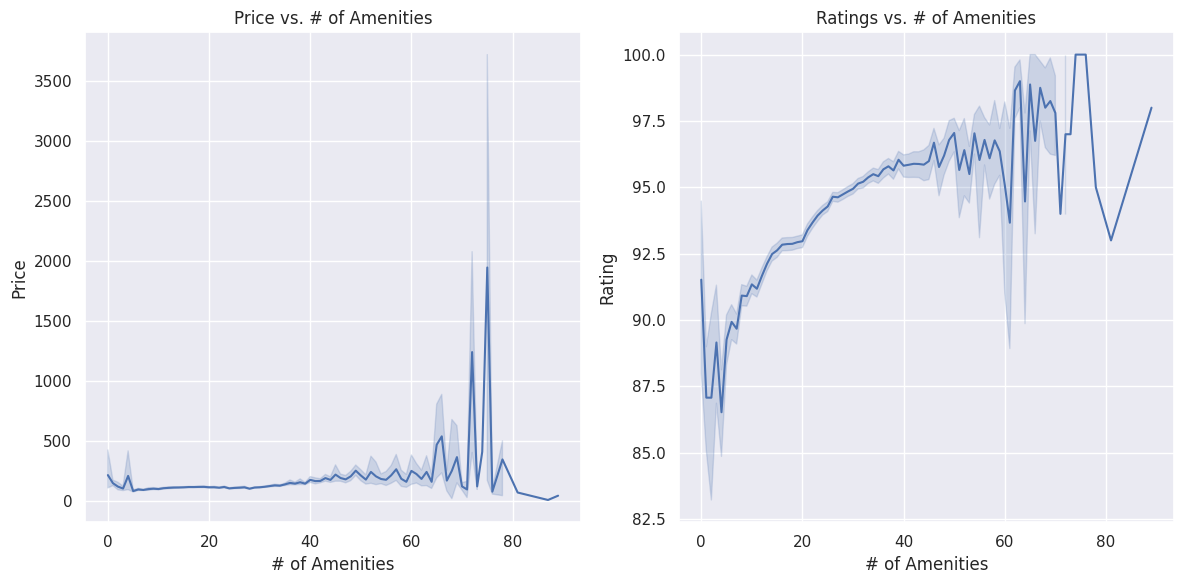

In [ ]:
#plot layout
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#Plot 1: Price vs # of Amenities
a2_plot = sns.lineplot(data=total_amenities[['price','total']],x='total',y='price',ax = ax[0])
#Set title and x/y labels
ax[0].set_title('Price vs. # of Amenities')
ax[0].set(xlabel = '# of Amenities', ylabel = 'Price')

#Plot 2: Rating vs # of Amenities
a3_plot = sns.lineplot(data=total_amenities[['review_scores_rating','total']],x='total',y='review_scores_rating',ax = ax[1])
#Set title and x/y labels
ax[1].set_title('Ratings vs. # of Amenities')
ax[1].set(xlabel = '# of Amenities', ylabel = 'Rating')

fig.tight_layout()
fig.show()

As we can see from this, the price trends slightly upwards as a function of # of amenities, which is what our initial intuition would suggest. With rating, there's less of a trend, but still some increase when we enter the 60+ amenity range.

####Amenity Counts

Now we need to clean up the data a little more. We'll explode the amenities column to get a better sense of the amenities that hosts have.

In [ ]:
#Get list of all amenities
amenity_list = listings_df['amenities'].explode()
amenity_list

0                         Heating
0                         Kitchen
0                          Washer
0                            Wifi
0         Long term stays allowed
                   ...           
279711                  Hot water
279711                 Essentials
279711                 Bed linens
279711                 Dishwasher
279711               Coffee maker
Name: amenities, Length: 5464937, dtype: object

In [ ]:
#amenity_list.drop(columns = 'index',inplace = True)
amenities = amenity_list.value_counts().reset_index()
amenities


,index,amenities
0,Wifi,259952
1,Essentials,253393
2,Long term stays allowed,240792
3,Kitchen,240766
4,TV,212864
...,...,...
3259,Tedge Bluetooth sound system,1
3260,Fogão com forno gas stove,1
3261,Dove ou Lux body soap,1
3262,Fogão com forno oven,1


####Replacing Common Synonymous Words


One thing we're noticing here is that a lot of these entries with less frequency can actually be grouped in the same way for our purposes. For example: Entry 163 is "Wifi - 50 Mbps" and entry 167 is "Wifi -20 Mbps." We definitely want to find a way to group these together, as it could change what the most popular amenity is. We'll use difflib to visualize the variations of common ammenity names and group them together.





In [ ]:
#Common amenities with variations
common_amenities = ['wifi','tv','garage','washer','coffee','parking','oven','sound system', 'dryer', 'gym','kitchen']

#Convert amenities column to lowercase
amenities['index'] = amenities['index'].str.lower()
for elem in common_amenities:
  #Choose a lowe enough similarity score to capture all potential matches
  print(elem+': '+str(dl.get_close_matches(elem,amenities['index'],120,0.4)))



wifi: ['wifi', 'pocket wifi', 'wifi – 8 mbps', 'wifi – 6 mbps', 'wifi – 5 mbps', 'wifi – 4 mbps', 'wifi – 2 mbps', 'wifi – 1 mbps', 'wifi – 90 mbps', 'wifi – 87 mbps', 'wifi – 82 mbps', 'wifi – 80 mbps', 'wifi – 75 mbps', 'wifi – 72 mbps', 'wifi – 71 mbps', 'wifi – 70 mbps', 'wifi – 67 mbps', 'wifi – 60 mbps', 'wifi – 56 mbps', 'wifi – 55 mbps', 'wifi – 53 mbps', 'wifi – 50 mbps', 'wifi – 48 mbps', 'wifi – 47 mbps', 'wifi – 46 mbps', 'wifi – 45 mbps', 'wifi – 44 mbps', 'wifi – 42 mbps', 'wifi – 40 mbps', 'wifi – 39 mbps', 'wifi – 35 mbps', 'wifi – 33 mbps', 'wifi – 32 mbps', 'wifi – 31 mbps', 'wifi – 30 mbps', 'wifi – 29 mbps', 'wifi – 27 mbps', 'wifi – 25 mbps', 'wifi – 24 mbps', 'wifi – 22 mbps', 'wifi – 21 mbps', 'wifi – 20 mbps', 'wifi – 18 mbps', 'wifi – 16 mbps', 'wifi – 15 mbps', 'wifi – 12 mbps', 'wifi – 10 mbps', 'wifi – 950 mbps', 'wifi – 900 mbps', 'wifi – 870 mbps', 'wifi – 800 mbps', 'wifi – 600 mbps', 'wifi – 500 mbps', 'wifi – 430 mbps', 'wifi – 400 mbps', 'wifi – 350 mb

Ok, now that we can see where some elements clearly need to be grouped, we can begin to do so. Wifi, TV, and oven seem like definite candidates to have their variations grouped together. A few others are also good candidates. We'll do this by checking if the substring is in the instance, and if so, replace. We'll need to be careful in certain instances such as washer, where dishwasher would actually be referring to something entirely different.

In [ ]:
#Perform explode and save to new df
al = listings_df[['listing_id', 'amenities']].explode('amenities')

In [ ]:
#Convert amenities to string and lowercase
al['amenities'] = al['amenities'].astype(str)
al['amenities'] = al['amenities'].str.lower()

#Perform replacement 
al['amenities'] = al['amenities'].apply(lambda row: 'wifi' if 'wifi' in row else row)

In [ ]:
#drop listing id
al.drop(columns = 'listing_id', inplace = True)

In [ ]:
#View the new values
al = al.value_counts().reset_index()
al

,amenities,0
0,wifi,271938
1,essentials,253393
2,long term stays allowed,240792
3,kitchen,240766
4,tv,212864
...,...,...
2913,irish spring body soap,1
2914,barra de sonido bose bluetooth sound system,1
2915,ipad air sound system,1
2916,ipad air sound system,1


Beautiful, so now we see our concept worked. Wifi went from 259952 to 271938 values. Now we can do this with the rest of our previously decided amenities to get closer to the true count of each amenity across our data set.

In [ ]:
#Explode amenities and convert to lowercase strings for comparison
al = listings_df.explode('amenities')
al['amenities'] = al['amenities'].astype(str)
al['amenities'] = al['amenities'].str.lower()

In [ ]:
#List of amenities to convert
to_replace = ['wifi','tv','garage','washer','coffee','parking','oven','sound system', 'dryer', 'gym','kitchen']

#Function to replace, with exceptions for diswasher vs washer and hair dryer vs dryer
def replace_string(x,substring):
  x['amenities'] = x['amenities'].apply(lambda row: substring if substring in row  and row != 'dishwasher' and row != 'hair dryer' else row)

#Perform replacements
for elem in to_replace:
  replace_string(al,elem)

In [ ]:
#Visualize values of each datatype
al_vals = al['amenities'].value_counts().reset_index()
al_vals

,index,amenities
0,tv,277692
1,wifi,271938
2,essentials,253393
3,kitchen,242410
4,long term stays allowed,240792
...,...,...
1711,vegan sıvı sabun body soap,1
1712,hisense with icebox refrigerator,1
1713,fogão com forno gas stove,1
1714,dove ou lux body soap,1


####Amenity Selection For Modeling

We can see it was important we did this. Now we notice TV actually is the most common amenity, followed by wifi. We have a truer sense of what the commonality of ammenities really is. Let's apply this to our primary DataFrame now, and then regroup the amenities together in a new column. We'll need to get creative with our methodology for selecting amenities. While we want some that appear frequently, we also want some that are unique and could be have impact on a good rating.

In [ ]:
#Amenities we will keep for our modeling
amenities_to_consider = ['tv',
  'wifi',
  'essentials',
  'kitchen',
  'long term stays allowed',
  'parking',
  'dedicated workspace',
  'air conditioning',
  'elevator',
  'first aid kit',
  'private entrance',
  'pool',
  'gym',
  'patio or balcony',
  'breakfast']

In [ ]:
#Create a join df, explode amenities, then replace the variations of amenities with the actual amenities
amenities_join = listings_df.explode('amenities')
amenities_join['amenities'] = amenities_join['amenities'].astype(str)
amenities_join['amenities'] = amenities_join['amenities'].str.lower()
for elem in to_replace:
  replace_string(amenities_join,elem)


In [ ]:
#Only keep columns we need for joining
amenities_join = amenities_join[['listing_id','amenities']]
amenities_join

,listing_id,amenities
0,281420,heating
0,281420,kitchen
0,281420,washer
0,281420,wifi
0,281420,long term stays allowed
...,...,...
279711,40219504,hot water
279711,40219504,essentials
279711,40219504,bed linens
279711,40219504,dishwasher


Ok, so now we want to create new columns for each amenity. We will assign a 1 if that listing has that amenity present and a 0 otherwise.

In [ ]:
#Loop to create new columns with each of our selected amenities
for i in amenities_to_consider:
  amenities_join[i] = amenities_join.apply(lambda x : 1 if x['amenities'] == i else 0, axis = 1)

The previous function created multiple rows with the same listing, as each amenity is on a different line, so we need to group these together and sum to have all the 1's and 0's assigned to a single listing ID.

In [ ]:
#Performing group by so there's only one instance of each listing
amenities_join_group = amenities_join.groupby(by='listing_id')['tv','wifi','essentials','kitchen','long term stays allowed','parking','dedicated workspace','air conditioning','elevator','first aid kit','private entrance','pool','gym','patio or balcony','breakfast'].sum().reset_index()

<ipython-input-39-269333e848ed>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  amenities_join_group = amenities_join.groupby(by='listing_id')['tv','wifi','essentials','kitchen','long term stays allowed','parking','dedicated workspace','air conditioning','elevator','first aid kit','private entrance','pool','gym','patio or balcony','breakfast'].sum().reset_index()


In [ ]:
#Get every column other than listing_id
other_cols = amenities_join_group.columns.difference(['listing_id'])

#Function to ensure everything is in binary, i.e. no 2's, 3's etc from our groupby
def change_to_binary(df):
  other_cols = df.columns.difference(['listing_id'])
  for column in other_cols:
    df[column] = df[column].apply(lambda x: 0  if x == 0 else 1)

#perform change
change_to_binary(amenities_join_group)


Ok, now that we've done that work, let's visualize our dataframe that we will be joining to our primary dataframe.

In [ ]:
amenities_join_group

,listing_id,tv,wifi,essentials,kitchen,long term stays allowed,parking,dedicated workspace,air conditioning,elevator,first aid kit,private entrance,pool,gym,patio or balcony,breakfast
0,2577,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0
1,2595,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
2,2737,0,1,0,1,1,1,0,0,1,1,0,0,0,0,0
3,2903,1,1,1,0,1,0,1,1,0,1,0,0,0,0,1
4,3079,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279429,48338892,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0
279430,48339035,1,1,1,1,1,1,0,0,0,0,0,1,1,0,0
279431,48339041,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1
279432,48339877,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0


In [ ]:
#Performing the join
listings_df = listings_df.merge(amenities_join_group,how='inner',on = 'listing_id')

In [ ]:
#Dropping the previous amenities column that was a list of amenities
listings_df.drop(columns = 'amenities', inplace = True)

Now we have our fully created listings_df  with some of our most common amenities as well as some amenities we found to be unique. This will be the base dataframe we use for modeling. Additionally, we will create another dataframe called 'reviews_listing_df' which is the same as "listings_df' but drops rows in which the rating column is NA. This will be the dataframe we use for the modeling section where we predict Airbnb ratings. 

In [ ]:
# Price has no missing values but reviews does so we store a new dataframe with only those that have reviews
reviews_listing_df = listings_df[listings_df['review_scores_rating'].notna()]
reviews_listing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188199 entries, 0 to 279433
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   188199 non-null  int64         
 1   name                         188199 non-null  object        
 2   host_id                      188199 non-null  int64         
 3   host_since                   188199 non-null  datetime64[ns]
 4   host_location                188199 non-null  object        
 5   host_response_time           111084 non-null  object        
 6   host_response_rate           111084 non-null  float64       
 7   host_acceptance_rate         128995 non-null  float64       
 8   host_is_superhost            188199 non-null  int64         
 9   host_total_listings_count    188199 non-null  float64       
 10  host_has_profile_pic         188199 non-null  int64         
 11  host_identity_verified    

####Distribution After Transformations

Let's see what the breakdown of amenities we have is.

In [ ]:
amenities_plot = al_vals[al_vals['index'].isin(['tv','wifi','essentials','kitchen','long term stays allowed','parking','dedicated workspace','air conditioning','elevator','first aid kit','private entrance','pool','gym','patio or balcony','breakfast'])]
amenities_plot

,index,amenities
0,tv,277692
1,wifi,271938
2,essentials,253393
3,kitchen,242410
4,long term stays allowed,240792
10,dedicated workspace,179108
11,parking,178117
15,air conditioning,142511
19,elevator,101532
27,first aid kit,82158


We'll create a histogram to see this breakdown.

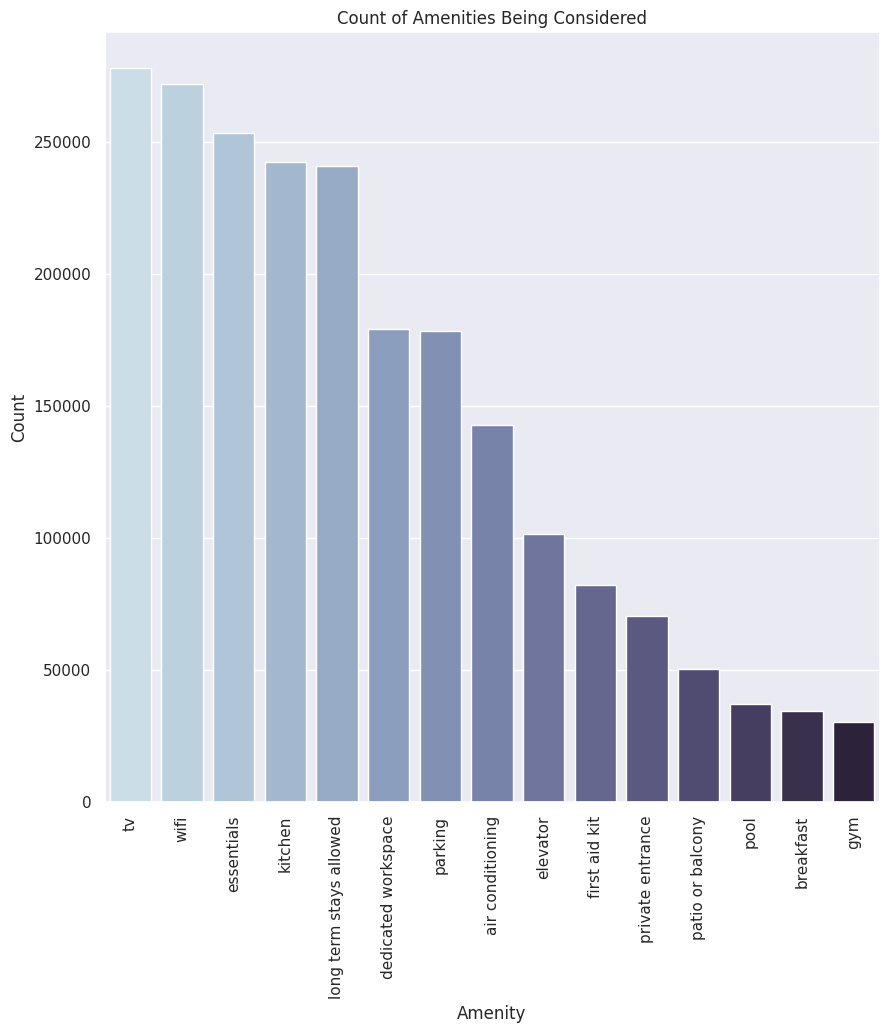

In [ ]:
#Creation of histogram plot
amenities_hist = sns.barplot(data=amenities_plot, x="index", y="amenities", palette = "ch:s=.25,rot=-.25")

#Set title and axes
amenities_hist.set(title='Count of Amenities Being Considered', xlabel='Amenity', ylabel='Count')
plt.xticks(rotation=90)
plt.show()

Let's also put this into a Wordcloud for another type of visualization.

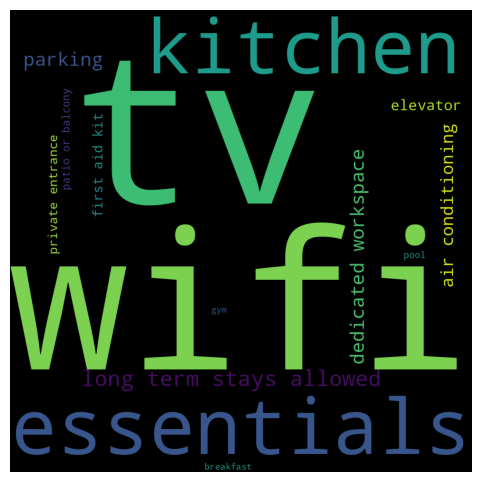

In [ ]:
#Creating Keys and values for the Dictionary
keys = amenities_plot['index']
values = amenities_plot['amenities']
word_dict = dict(zip(keys, values))

#Implementing wordcloud plot
wordcloud = WordCloud(width=1000, height=1000, background_color = 'black').generate_from_frequencies((word_dict))
plt.figure(figsize = (8,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We can now see the breakdown of the number of airbnbs with each type of amenity we've selected. This seems like a good breakdown, with some of the most popular ones and also some more unique ones. Let's look at distribution of listings that have these amenities.

In [ ]:
#Create a total amenities column for each listing
amenities_sum_df = listings_df
amenities_sum_df['total_amenities'] = amenities_sum_df.loc[:,amenities_to_consider].sum(axis=1)

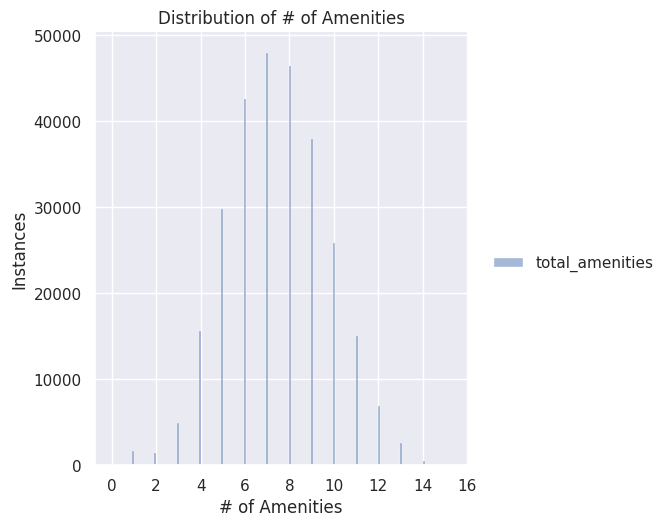

In [ ]:
#Plot distribution of total amenities
a_plot = sns.displot(data=amenities_sum_df[['total_amenities']])
a_plot.set(title='Distribution of # of Amenities', xlabel='# of Amenities', ylabel='Instances')
plt.xticks([0,2,4,6,8,10,12,14,16])
plt.show()

So we can see that this is a pretty normal distribution, which works nicely. We can now revisit our price and ratings vs amenities plots to see if they look similar to the very start of this amenities EDA.

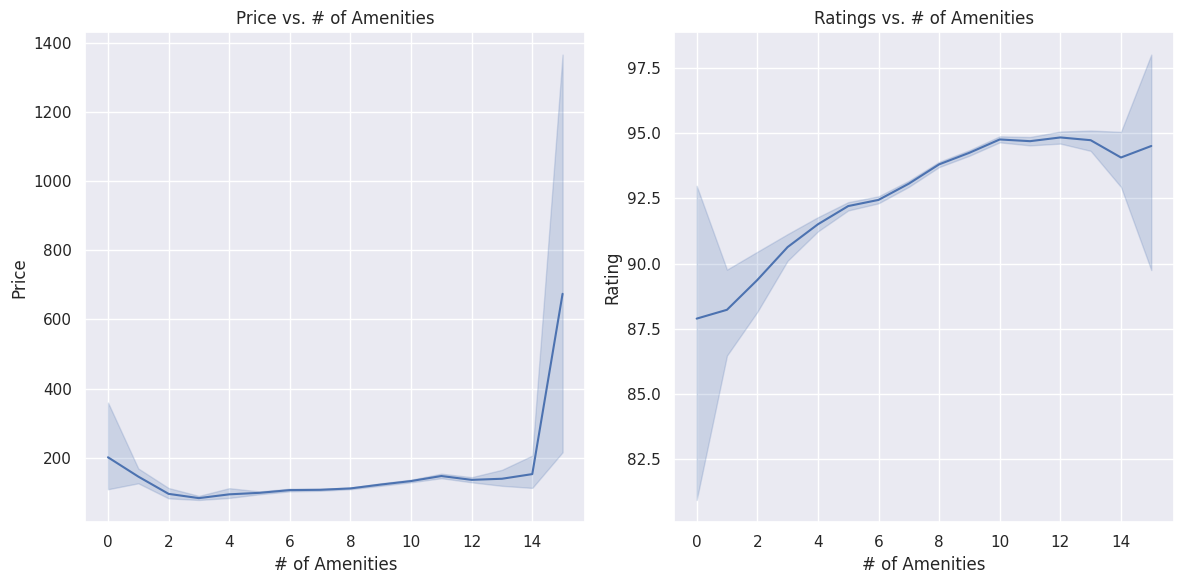

In [ ]:
#plot layout
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#Plot 1: Price vs # of Amenities
amenities_line1 = sns.lineplot(data=amenities_sum_df[['price','total_amenities']],x='total_amenities',y='price',ax = ax[0])
#Set title and x/y labels
ax[0].set_title('Price vs. # of Amenities')
ax[0].set(xlabel = '# of Amenities', ylabel = 'Price')

#Plot 2: Rating vs # of Amenities
amenities_line2 = sns.lineplot(data=amenities_sum_df[['review_scores_rating','total_amenities']],x='total_amenities',y='review_scores_rating',ax = ax[1])
#Set title and x/y labels
ax[1].set_title('Ratings vs. # of Amenities')
ax[1].set(xlabel = '# of Amenities', ylabel = 'Rating')

fig.tight_layout()
fig.show()

From what we can see, the trends look similar, with potentially more of a trend upwards for both. This is a good sign, as it shows we didn't lose our prior statistical trend that higher # of amenities leads to slightly higher prices and ratings. We can now move onto a brief feature analysis

## Host Analysis

We now would like to see if we can find any interesting information about hosts. In this portion of the analysis, we go ahead and look at the relationship between superhosts and various metrics, host response time, acceptance rate, and other information related to hosts. While some of our inferences were verified, others were proven to be different.

###Hosts vs Number of Places

First, let's see if there is a link between the number of listings associated with a host vs. the average price or rating of an Airbnb. To make this analysis more cogent, we'll group the number of listings into four bins: Less than 10, 11-50,51-100, and 100+.

In [ ]:
#look at host # of properties vs ratings and prices
host_bin_query = '''
                  SELECT host_id AS Host, host_total_listings_count AS [Listing Number], AVG(review_scores_rating) AS [Average Rating], AVG(price) AS [Average Price], 
                  CASE 
                    WHEN host_total_listings_count <= 10 Then 'Low'
                    WHEN host_total_listings_count <= 50  Then 'Mid-Low'
                    WHEN host_total_listings_count <= 100 Then 'Mid-High'
                    WHEN host_total_listings_count > 100 Then 'High'
                  END AS bins
                  FROM listings_df
                  GROUP BY host_id, bins
                  '''
host_bin_df = ps.sqldf(host_bin_query, locals())
host_bin_df

,Host,Listing Number,Average Rating,Average Price,bins
0,1822,5.0,90.000000,56.85732,Low
1,1944,12.0,95.400000,52.48368,Mid-Low
2,2330,3.0,69.333333,68.52036,Low
3,2353,1.0,91.000000,87.47280,Low
4,2438,0.0,NaN,95.00000,Low
...,...,...,...,...,...
181801,389764135,1.0,NaN,25.97000,Low
181802,389953017,2.0,NaN,6.72623,Low
181803,390125111,0.0,NaN,15.58200,Low
181804,390178153,1.0,NaN,4.25908,Low


We will visualize this information by looking at boxplots of each bin.

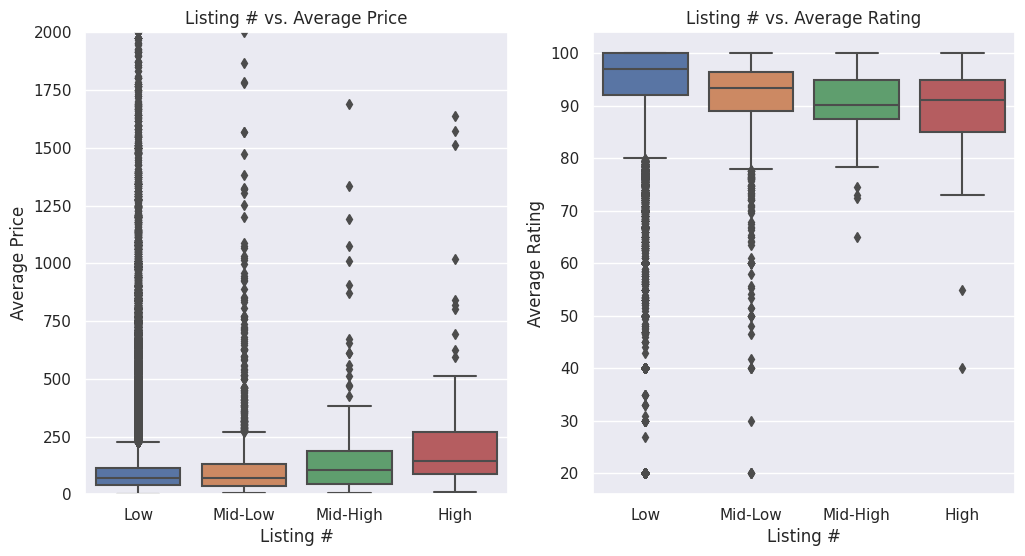

In [ ]:
#plot layout
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#Get data to be used
bin_data = host_bin_df

#Plot 1: Listing # vs Price
host_plot1 = sns.boxplot(data=bin_data[['Average Price','bins']],x='bins',y='Average Price',ax = ax[0])
#Set title and x/y labels
ax[0].set_title('Listing # vs. Average Price')
ax[0].set(xlabel = 'Listing #', ylabel = 'Average Price')

#Cut off the y limit for better visualization of the graph
ax[0].set_ylim(0, 2000)

#Plot 2: Listing # vs Rating
host_plot2 = sns.boxplot(data=bin_data[['Average Rating','bins']],x='bins',y='Average Rating',ax = ax[1])
#Set title and x/y labels
ax[1].set_title('Listing # vs. Average Rating')
ax[1].set(xlabel = 'Listing #', ylabel = 'Average Rating')

#fig.tight_layout()
#plt.figure(figsize = (16,16))
plt.show()

Based on what we can see in the above figures, it seeems as though hosts with more listings have a better distribuion as far as average price goes, but a worse distributions in terms of ratings. This could be for a multitude of reasons, like hosts with more places taking less care with each individual listing vs hosts with less listings putting more time and energy into their fewer listings.

###Superhosts vs Hosts Analysis

####Counts of Superhosts vs Hosts
Let's next take a look at the breakdown of the number of superhost listings vs non-superhost listings.

<ipython-input-53-9201de988578>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  host_hist.set_xticklabels(['Not Superhost', 'Superhost'])


[Text(0, 0, 'Not Superhost'), Text(1, 0, 'Superhost')]

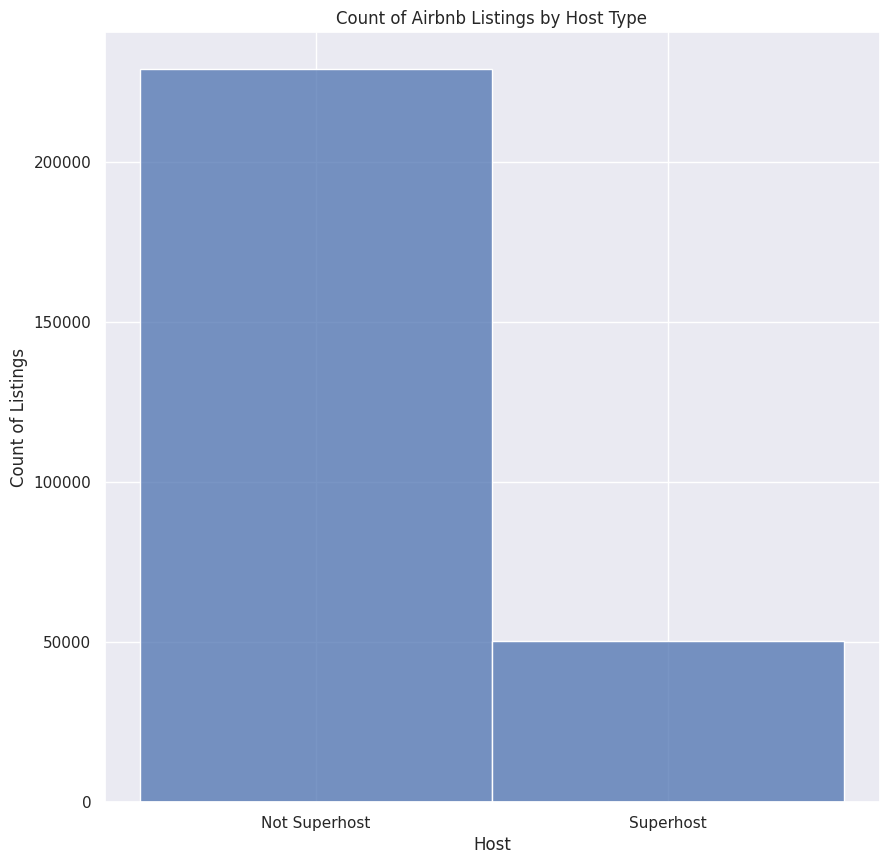

In [ ]:
host_hist = sns.histplot(data=listings_df['host_is_superhost'].astype(str))
host_hist.set(title='Count of Airbnb Listings by Host Type', xlabel='Host', ylabel='Count of Listings')
host_hist.set_xticklabels(['Not Superhost', 'Superhost'])


As we can see, becoming a superhost is pretty selective. We imagine that with this, there will be higher pricing and average rating associated with being a superhost. This is a feature that could heavily play into our predictive modeling when predicting price and average ratings of various Airbnbs. Let's do some more investigation to confirm our suspicion. We'll first look at how superhosts do in comparison to non-super hosts as far as pricing and ratings. For both of these, we assume being a super host results in higher values, so let's go ahead and see if this is the case.

####Superhosts vs Average Price and Ratings

Let's see if there's a difference between superhosts and regular hosts when it comes to price and ratings.

In [ ]:
host_type_query = '''
                  SELECT host_is_superhost, Avg(price) AS Average_Price, Avg(review_scores_rating) AS Average_Rating
                  FROM listings_df
                  GROUP BY host_is_superhost
                  
                  '''
host_type_df = ps.sqldf(host_type_query, locals())
host_type_df

,host_is_superhost,Average_Price,Average_Rating
0,0,115.496688,92.261410
1,1,104.639563,96.996437


There's a bit of unexpected results here. While the average ratings are higher for superhosts, which is what we would expect, the average price is actually lower. It would be interesting how this varies based on city as well, so let's look at that briefly next.

In [ ]:
host_type_city_query = '''
                  SELECT city,host_is_superhost, Avg(price) AS Average_Price, Avg(review_scores_rating) AS Average_Rating
                  FROM listings_df
                  GROUP BY city,host_is_superhost
                  
                  '''
host_type_city_df = ps.sqldf(host_type_city_query, locals())
host_type_city_df

,city,host_is_superhost,Average_Price,Average_Rating
0,Bangkok,0,62.313190,91.476878
1,Bangkok,1,56.696330,96.561587
2,Cape Town,0,134.472281,93.047897
3,Cape Town,1,132.035860,97.421355
4,Hong Kong,0,100.410591,88.382457
5,Hong Kong,1,70.861827,95.768546
6,Istanbul,0,28.680539,89.252076
7,Istanbul,1,21.020327,96.547440
8,Mexico City,0,64.767692,93.137939
9,Mexico City,1,59.561781,97.300779


As we can see, even if we break it down by city, the trend holds for almost all cities except for Paris, where the average Superhost price is actually higher. Intuitively, we thought average prices would be higher for superhosts, but clearly that isn't the case. 

####Superhosts vs Acceptance Rate

We go on to create a query below to see if acceptance rates are higher or lower for superhosts. The results show that acceptance rates for superhosts are substantially higher, with an over 11% greater chance of accepting guests.

In [ ]:
#Query to get host is superhost vs acceptance rate
host_acceptance_query = '''
                  SELECT host_is_superhost [Is Superhost], Avg(host_acceptance_rate) AS [Host Acceptance Rate]
                  FROM listings_df
                  WHERE host_acceptance_rate IS NOT NULL
                  GROUP BY host_is_superhost
                  '''
host_acceptance_df = ps.sqldf(host_acceptance_query, locals())
host_acceptance_df

,Is Superhost,Host Acceptance Rate
0,0,0.795198
1,1,0.908664


### Host Response Time Analysis

Finally, we look at the link between host response time and the average prices and ratings for Airbnb listings.

In [ ]:
host_response_query = '''
                      SELECT host_response_time, AVG(review_scores_rating) AS Average_Rating, AVG(price) AS Average_Price
                      FROM listings_df
                      GROUP BY host_response_time 
                      '''

host_response_df = ps.sqldf(host_response_query, locals())
host_response_df

,host_response_time,Average_Rating,Average_Price
0,None,93.212073,113.881760
1,a few days or more,90.424429,110.180735
2,within a day,93.513520,145.335798
3,within a few hours,93.906879,118.767003
4,within an hour,93.804804,102.901695


Now, we will visualize the data with lineplots.

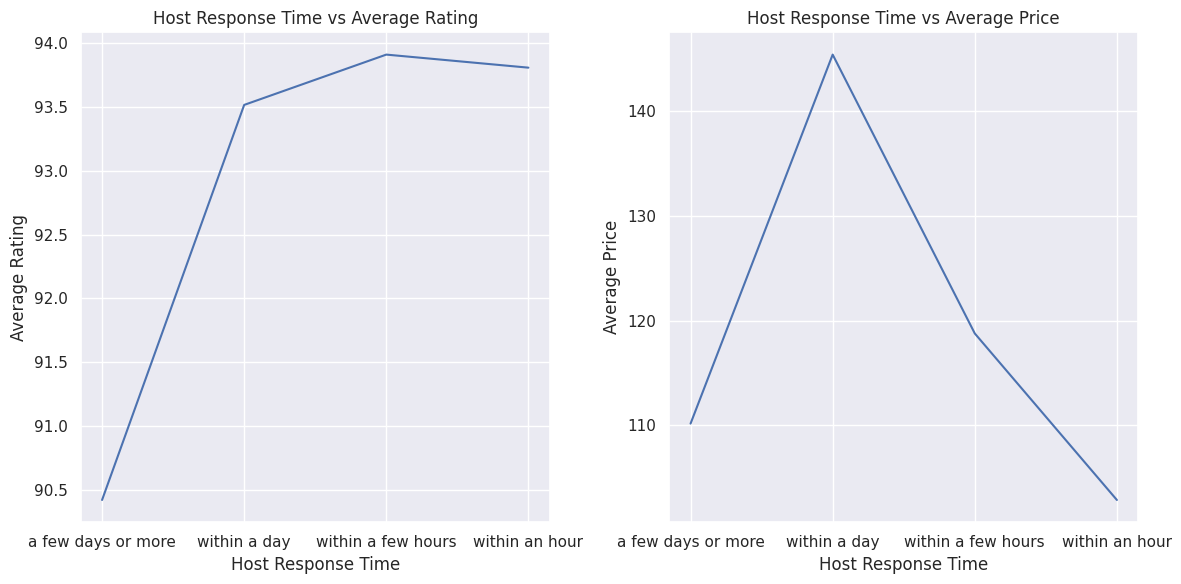

In [ ]:
#plot layout
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#Plot 1: Price vs # of Amenities
host_response1 = sns.lineplot(data=host_response_df[['host_response_time','Average_Rating']],x='host_response_time',y='Average_Rating',ax = ax[0])
#Set title and x/y labels
ax[0].set_title('Host Response Time vs Average Rating')
ax[0].set(xlabel = 'Host Response Time', ylabel = 'Average Rating')

#Plot 2: Rating vs # of Amenities
host_response2 = sns.lineplot(data=host_response_df[['host_response_time', 'Average_Price']],x='host_response_time',y='Average_Price',ax = ax[1])
#Set title and x/y labels
ax[1].set_title('Host Response Time vs Average Price')
ax[1].set(xlabel = 'Host Response Time', ylabel = 'Average Price')

fig.tight_layout()
fig.show()

From the above graphs, we can see there is a link between response time and a host's average rating. There's a sharp increase between a few day response to a day response, a more slight increase to a few hour response, and then it slightly goes down once you respond within an hour. While we expected the increase to be inversely proportional to the response time, it's not quite the case. That being said, taking a few or more days to respond seems to have a strong negative impact on the score. With the average price, there is much less of a correlation, and we really can't take much from the trend. Based on what we can see though, the priciest hosts have response times within a day.

## Geographic Analysis

### General Geographic Frequency

We create a histogram below in order to get a general sense of the most common cities for each Airbnb listing in the dataset. It appears Paris has by far the most listings with New York and Sydney coming in behind as the second and third most frequent. 

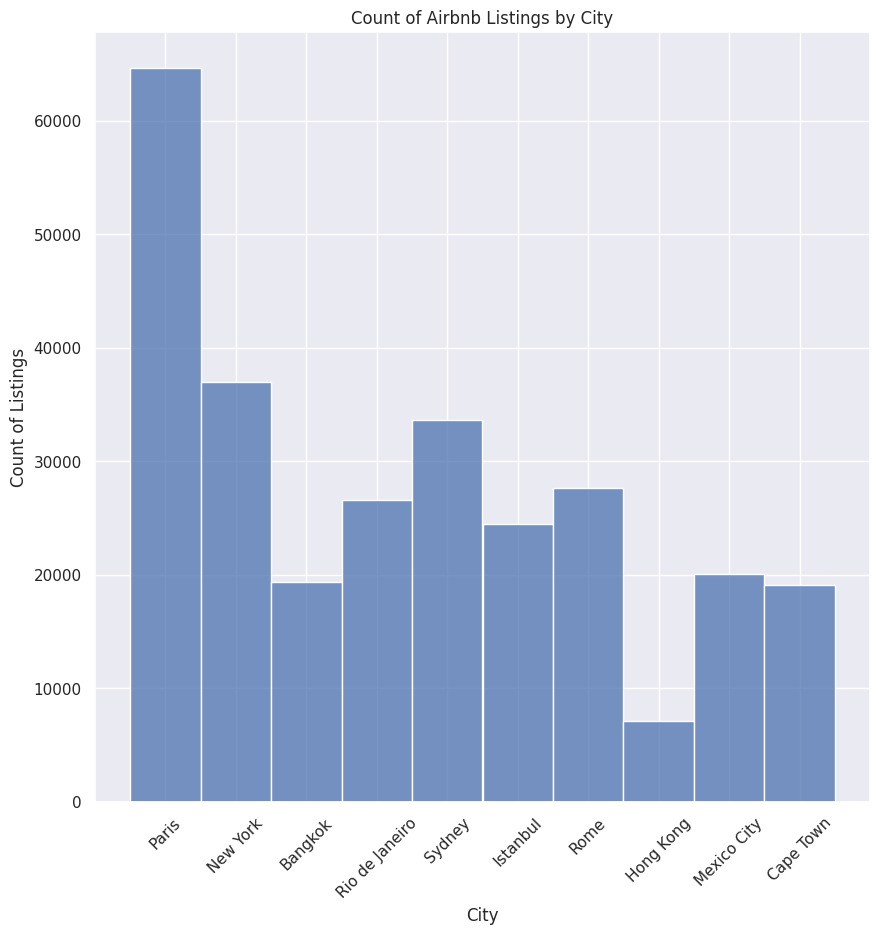

In [ ]:
geo_hist = sns.histplot(data=listings_df['city'])
geo_hist.set(title='Count of Airbnb Listings by City', xlabel='City', ylabel='Count of Listings')
plt.xticks(rotation=45)
geo_hist = geo_hist

Next, we create a similar view but in a more visually appealing way. The following map shows the count of listings from our dataset by country on a geography plot. This gives a good view of how widespread around the globe this data was taken from.

*Note we wanted to cite the example project from Recitation 9 as a reference of inspiration for the following geo plot. We were intrigued by their use of this plot so we took inspiration and made uss of the same library to generate a similar plot below*

In [ ]:
# extract the relevant geo data for plot
geo_country_data = listings_df[['city']]

# dictionary that maps city name to country
country_dict = {
    'Paris': 'France',
    'New York': 'United States of America',
    'Rio de Janeiro': 'Brazil',
    'Sydney': 'Australia',
    'Istanbul': 'Turkey',
    'Bangkok': 'Thailand',
    'Rome': 'Italy',
    'Hong Kong': 'China',
    'Cape Town': 'South Africa',
    'Mexico City': 'Mexico',
}

# Define function to use for mapping cities to countries
def convert_city(x):
  conversion = country_dict.get(x['city'])
  return conversion

# create country column for geo data by mapping city to corresponding country
geo_country_data['Country'] = geo_country_data.apply(convert_city, axis=1)


# group country data so we can get counts by country
geo_country_data_count = geo_country_data.groupby('Country').count().reset_index()

geo_country_data_count = geo_country_data_count.rename(columns={"city": "Number of Listings"})

# create geo plot
geo_plot = px.choropleth(
    data_frame = geo_country_data_count,
    locations = 'Country',
    locationmode = 'country names',
    color = 'Number of Listings',
    hover_name = 'Number of Listings'
)

geo_plot.show()


<ipython-input-60-ca1b5cf6b402>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_country_data['Country'] = geo_country_data.apply(convert_city, axis=1)


Let's check out the population densities by city, plot it as a bar plot to get a better visualization of the data:

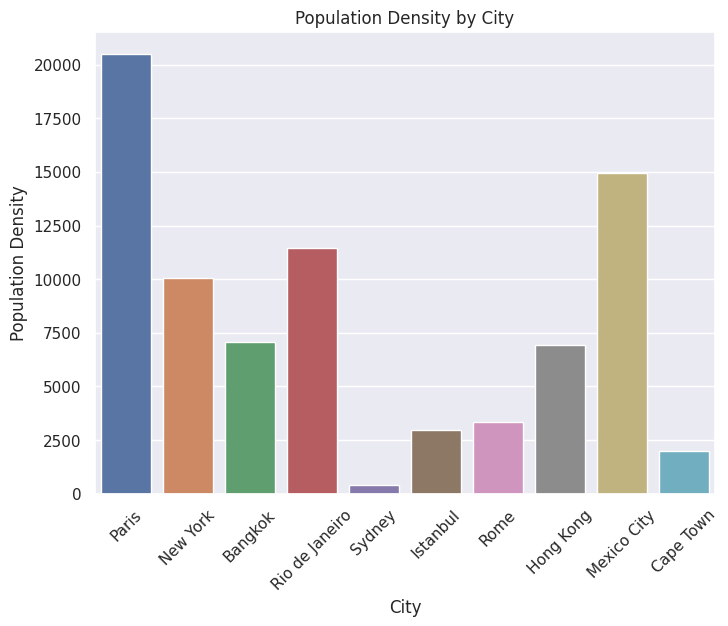

In [ ]:
cities_and_pop_densities = listings_pop_df[["pop_density", "city"]].drop_duplicates()

sns.set(rc={'figure.figsize': (8, 6)})
geo_bar = sns.barplot(x = cities_and_pop_densities["city"], y = cities_and_pop_densities['pop_density'])
geo_bar.set(title='Population Density by City', xlabel='City', ylabel='Population Density')
plt.xticks(rotation=45)
geo_bar = geo_bar
plt.show()

Let's see the correlations between population density, price, and rating.

In [ ]:
listings_pop_df[["price", "pop_density", "review_scores_rating"]].corr()

,price,pop_density,review_scores_rating
price,1.000000,0.007731,0.015725
pop_density,0.007731,1.000000,0.008111
review_scores_rating,0.015725,0.008111,1.000000


From our call to .corr(), it looks like any correlations that population density has with price and review score are pretty weak. Just to make sure there isn't anything weird such as a parabolic shape, let's graph population density vs average price and population density vs average rating.

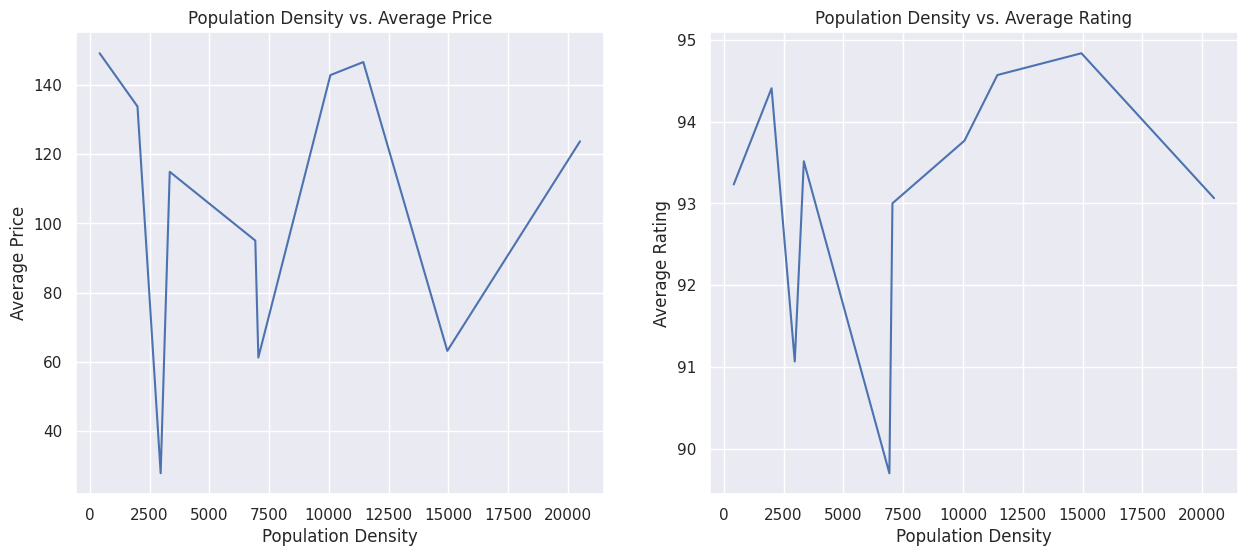

In [ ]:
#plot layout
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

#Get data to be used in the first plot
pop_and_price = listings_pop_df[["price", "pop_density"]]
pop_price_lineplot_df = pop_and_price.groupby(by="pop_density").mean().reset_index()

#Plot 1: Price vs Pop Density
host_plot1 = sns.lineplot(data=pop_price_lineplot_df, x='pop_density',y='price',ax = ax[0])

#Set title and x/y labels
ax[0].set_title('Population Density vs. Average Price')
ax[0].set(xlabel = 'Population Density', ylabel = 'Average Price')

# Get data to be used in the second plot
pop_and_rating = listings_pop_df[["review_scores_rating", "pop_density"]]
pop_rating_lineplot_df = pop_and_rating.groupby(by="pop_density").mean().reset_index()

#Plot 2: Rating vs Pop Density
host_plot2 = sns.lineplot(data=pop_rating_lineplot_df, x='pop_density',y='review_scores_rating',ax = ax[1])
#Set title and x/y labels
ax[1].set_title('Population Density vs. Average Rating')
ax[1].set(xlabel = 'Population Density', ylabel = 'Average Rating')

#fig.tight_layout()
#plt.figure(figsize = (16,16))
plt.show()

From the lineplots above, we can confirm that there doesn't seem to be any correlation between population density and average price or average rating, and thanks to the visualization we can rule out any higher order shape such as a parabola that .corr() would not entirely capture.

### Distribution of Price by Geographic Location: No Outlier Removal

Let's visualize the distribution of prices for each city using a boxplot: 

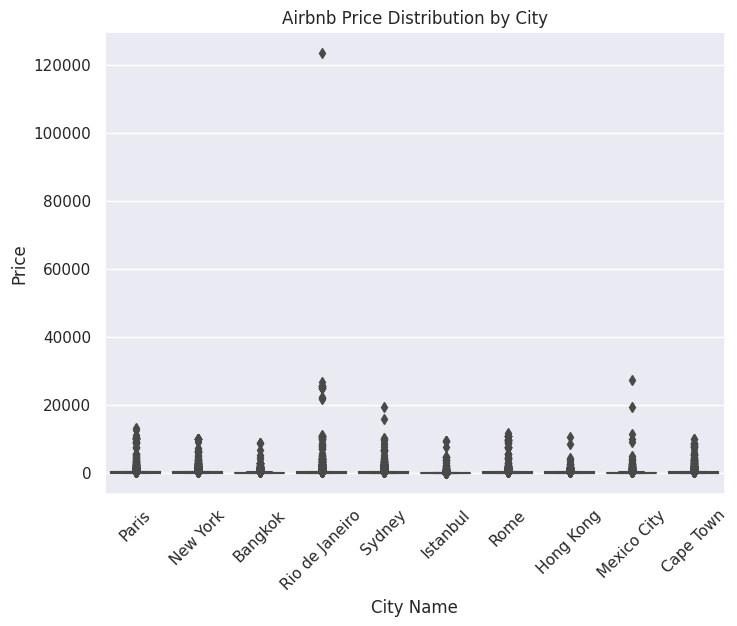

In [ ]:
# First look at box plots with all data produced a chart that was uninterpretable due to outliers throwing off the scale
sns.set(rc={'figure.figsize': (8, 6)})
geo_box = sns.boxplot(x=listings_df['city'], y=listings_df['price'])
geo_box.set(title='Airbnb Price Distribution by City', xlabel='City Name', ylabel='Price')
plt.xticks(rotation=45)
geo_box = geo_box
plt.show()

From the boxplot above, it can be seen that outliers really distort our data to the point it becomes difficult to visualize. In order to fix this, we're going to need outlier removal.

### Distribution of Price by Geographic location: Outlier Removal

For our outlier removal, we're going to need to make sure we don't determine what is an outlier using values across all cities, but only data for that specific city, as one city's median value can be another city's outlier. In order to do this, we wrote the function below that calculates the 25th and 75th percentile values of the specified column for each city, and then removes values that are a determined threshold below the 25th percentile value or above the 75th percentile value.


For our purposes, the threshold we used was half of the Interquartile Range (IQR), therefore values that are $\frac{1}{2} * $ IQR  below the 25th percentile values and $\frac{1}{2} * $ IQR above the 75th percentile values are removed for each city.

In [ ]:
def remove_outliers_by_city(df, cities, col):

  # Initialize list of DataFrames to concat() at the end
  df_list = []

  # Loop through the cities
  for city in cities:

    # Get only the rows for the city
    current_city =df[df["city"] == city]

    # Calculate the 25th and 75th percentiles
    q1 = float(current_city[col].quantile(0.25))
    q3 = float(current_city[col].quantile(0.75))

    iqr = q3-q1 #Interquartile range

    # Create the lower and upper bounds
    fence_low  = q1-.5*iqr  
    fence_high = q3+.5*iqr  

    # Apply the filter
    current_city[col] = current_city[col].apply(lambda x: x if (x > fence_low and x < fence_high) else np.NaN)

    # Append the values to the list of DataFrames
    df_list.append(current_city)
  
  # Outside the for-loop, combine them all
  output_df = pd.concat(df_list)

  # Drop the NaN values, ie the outliers
  output_df.dropna(axis = 0, inplace = True)
  
  return output_df

First, we use the function above to remove outliers:

In [ ]:
#Suppress warnings
import warnings
warnings.filterwarnings('ignore') # Do this for no_outliers calculatopm

#Filter outliers
with_outliers_price = listings_df[["price", "city"]]
cities_list = list(with_outliers_price['city'].unique())
no_outliers_price = remove_outliers_by_city(with_outliers_price, cities_list, 'price')

#Allow warnings again
warnings.filterwarnings('default')

Next, we'll create a box plot and a violin plot of the data with the outliers removed. 

Another way to enhance our visualization is to put the median values on top of the box plot. In order to do this we need to calculate the median price for each city, and then get that data into a list in the correct order so we can plot it on top of our box plot.

In [ ]:
# Get the medians
medians = no_outliers_price.groupby(["city"])["price"].median()

#Unfortunately we lose the order of the cities with the above, so we need to get it back
medians_price_dict ={}

# Loop through the medians and round them
for index, row in medians.items():
  medians_price_dict[index] = round(row, ndigits = 1)

# This is the order the cities are in in the DataFrame
cities_ordered = ["Paris", "New York", "Bangkok", "Rio de Janeiro", "Sydney", "Istanbul", "Rome", "Hong Kong", "Mexico City", "Cape Town"]
cities_price_dict = {}

# Get the index position of each city, add it to the dict for each city. This dict is used in later calculations
for i, val in enumerate(cities_ordered):
  cities_price_dict[i] = val


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Now that we have the medians, let's plot the box and violin plots

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



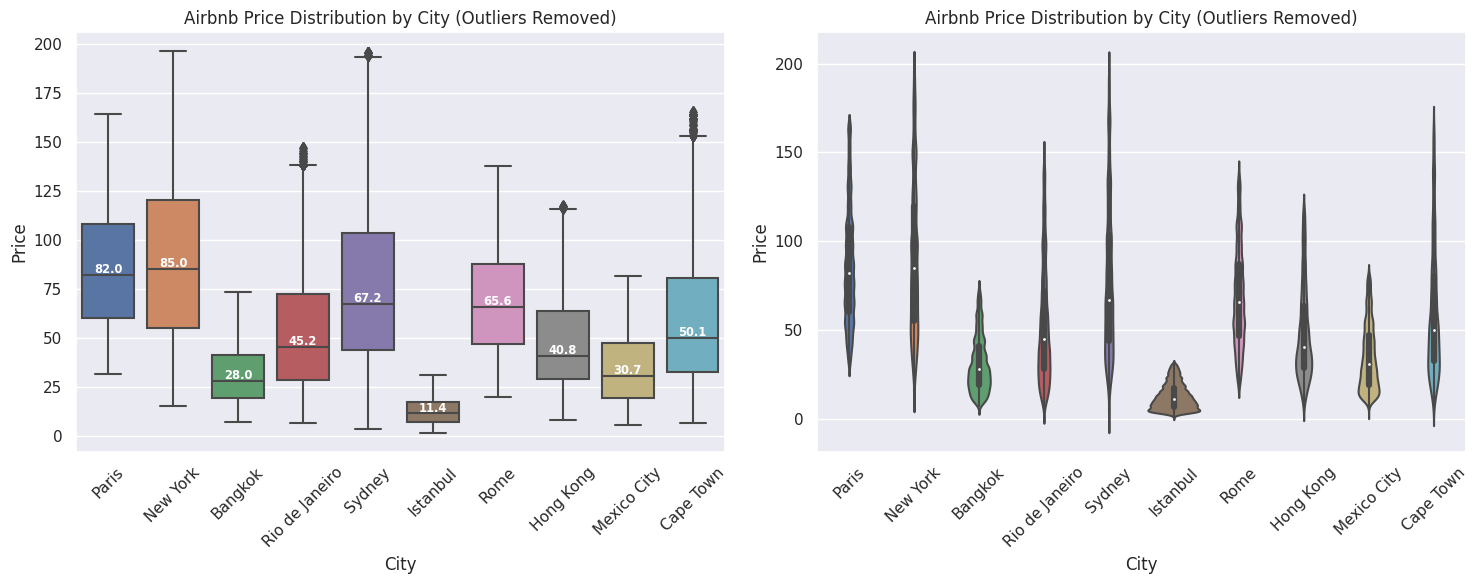

In [ ]:
# Plot layout
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Box plot with medians on top
geo_box = sns.boxplot(x=no_outliers_price['city'], y=no_outliers_price['price'], ax = ax[0])
geo_box.set(title='Airbnb Price Distribution by City (Outliers Removed)', xlabel='City', ylabel='Price')
ax[0].set_xticklabels(cities_ordered, rotation = 45) # Need to hard code this 

# Plot the medians: 
vertical_offset = 1; # This is just eyeballed

# Loop through the xticks and plot the medians using the dicts created earlier
for xtick in geo_box.get_xticks():
    ax[0].text(xtick, medians_price_dict[cities_price_dict[xtick]] + vertical_offset, medians_price_dict[cities_price_dict[xtick]], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')


#Plot 2: Violin plot
geo_violin = sns.violinplot(x=no_outliers_price['city'], y=no_outliers_price['price'], ax = ax[1])
geo_violin.set(title='Airbnb Price Distribution by City (Outliers Removed)', xlabel='City', ylabel='Price')
plt.xticks(rotation=45)

# Show the plot
fig.tight_layout()
plt.show()

As can be seen in the box plot above, with the outliers removed, we can get a much better visualization of the distributions of price for each city. Moreover, explicitly putting the median on the plot also helps us get a better understanding of the data.


The violin plot isn't as clean as the box plot, but it does allow us to see how some cities, such as Istanbul, have a lot of their data concentrated on the lower end for price. 

While the box and violin plots give us a more precise idea of the distributions, let's visualize the price difference on an actual map using the same process as we did earlier for the number of listings in each city:

*Note we wanted to cite the example project from Recitation 9 as a reference of inspiration for the following geo plot. We were intrigued by their use of this plot so we took inspiration and made uss of the same library to generate a similar plot below*

In [ ]:
#Suppress warnings
import warnings
warnings.filterwarnings('ignore') # Do this for no_outliers calculate

# extract the relevant geo data for plot
geo_country_data_price = no_outliers_price[['city', "price"]]

# create country column for geo data by mapping city to corresponding country 
# leveraging the convert_city function from above
geo_country_data_price['Country'] = geo_country_data_price.apply(convert_city, axis=1) 

# group country data so we can get counts by country
geo_country_data_median_price = geo_country_data_price.groupby('Country')["price"].median().reset_index()

# create geo plot
geo_plot_price = px.choropleth(
    data_frame = geo_country_data_median_price,
    locations = 'Country',
    locationmode = 'country names',
    color = 'price',
    hover_name = 'price'
)

geo_plot_price.show()

#Allow warnings again
warnings.filterwarnings('default')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



###Distribution of Ratings by Geographic Locations: No Outlier Removal

Here, we'll look at the distribution of ratings by location. If you recall, we created a separate dataframe earlier to hold all listings with ratings, called "review_listings." We'll use that to do our visualization in order to account for listings with N/A review values. We'll start by not removing any outliers and plotting the data in a box plot:

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



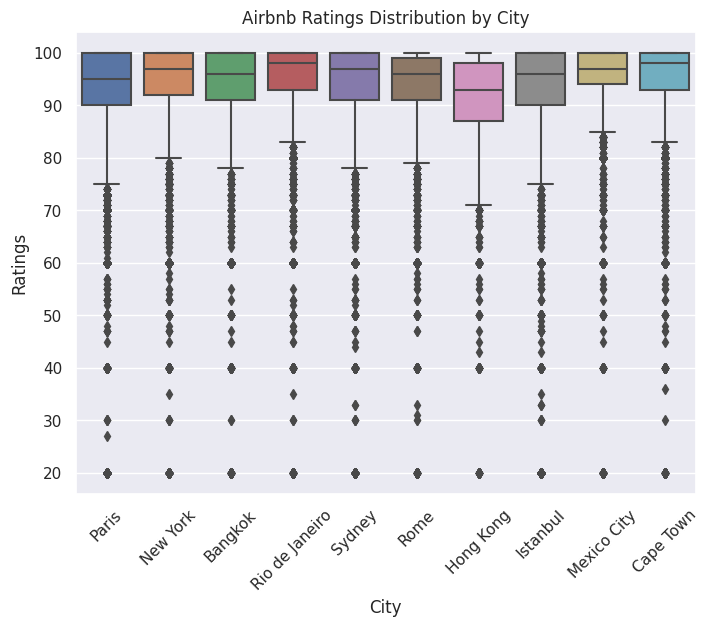

In [ ]:
#Plot the ratings across locations
sns.set(rc={'figure.figsize': (8, 6)})
ratings_plot = sns.boxplot(x=reviews_listing_df['city'], y=reviews_listing_df['review_scores_rating'])
ratings_plot.set(title='Airbnb Ratings Distribution by City', xlabel='City', ylabel='Ratings')
plt.xticks(rotation=45)
plt.show()

Similar to the prices analysis above, outliers are really distorting the data. To get a better visualization, we'll remove outliers on the ratings data as well.

### Distribution of Ratings by Geographic Locations: Strong Outlier Removal

Using the outlier removal function we defined earlier, let's remove instances where the rating is determined to be an outlier:

In [ ]:
#Suppress warnings
import warnings
warnings.filterwarnings('ignore') # Do this for no_outliers calculatopm

#Filter outliers
with_outliers_rating = reviews_listing_df[["review_scores_rating", "city"]]
cities_list = list(with_outliers_rating['city'].unique())
no_outliers_rating = remove_outliers_by_city(with_outliers_rating, cities_list, 'review_scores_rating')

#Allow warnings again
warnings.filterwarnings('default')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Now that we have outliers removed, let's calculate the median ratings for each city so we can plot them on top of the box plot like we did for prices

In [ ]:
# Get the medians
medians_rating = no_outliers_rating.groupby(["city"])["review_scores_rating"].median()

#Unfortunately we lose the order of the cities with the above, so we need to get it back
medians_rating_dict ={}

# Loop through the medians and roiund them
for index, row in medians_rating.items():
  medians_rating_dict[index] = round(row, ndigits = 1)

# This is the order the cities are in in the DataFrame
cities_ordered = ["Paris", "New York", "Bangkok", "Rio de Janeiro", "Sydney",  "Rome", "Hong Kong", "Istanbul", "Mexico City", "Cape Town"]
cities_rating_dict = {}

# Get the index position of each city, add it to the dict for each city. This dict is used in later calculations
for i, val in enumerate(cities_ordered):
  cities_rating_dict[i] = val


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Now that we have outliers removed and the medians we're going to plot on top of the box plot calculated, let's plot both the box and violin plots: 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



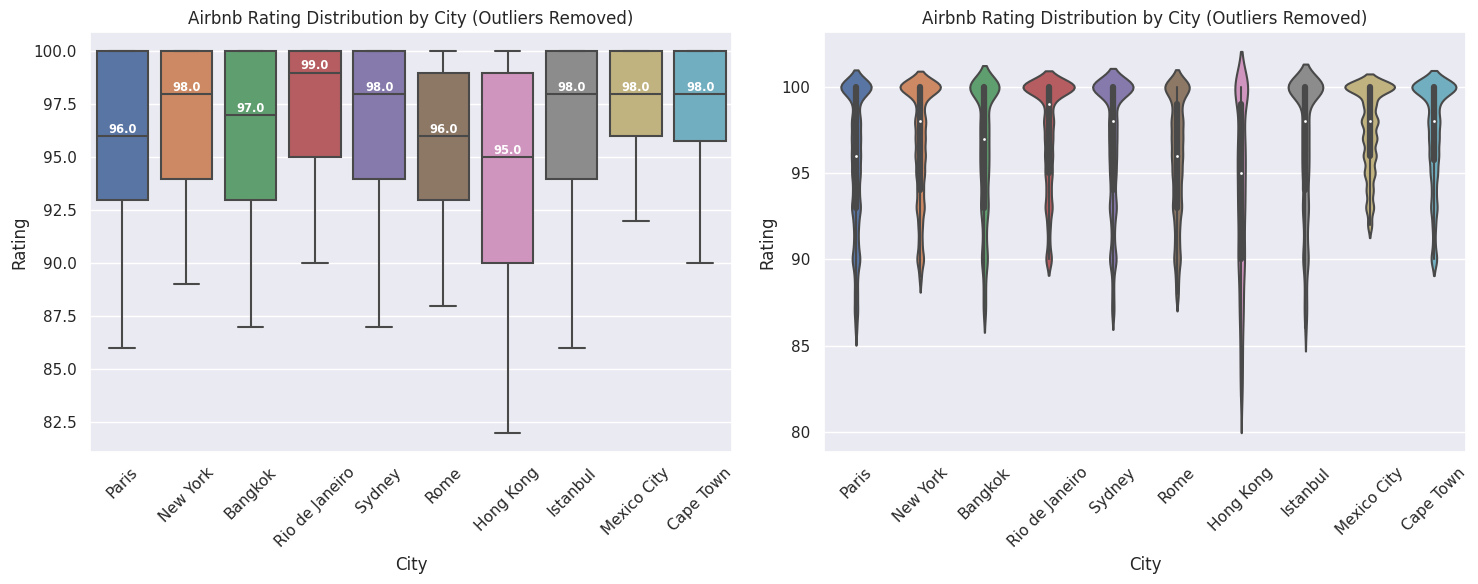

In [ ]:
# Plot layout
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Box plot with medians on top
geo_box = sns.boxplot(x=no_outliers_rating['city'], y=no_outliers_rating['review_scores_rating'], ax = ax[0])
geo_box.set(title='Airbnb Rating Distribution by City (Outliers Removed)', xlabel='City', ylabel='Rating')
ax[0].set_xticklabels(cities_ordered, rotation = 45) # Need to hard code this 

# Plot the medians: 
vertical_offset = .15; # This is just eyeballed

# Loop through the xticks and plot the medians using the dicts created earlier
for xtick in geo_box.get_xticks():
    ax[0].text(xtick, medians_rating_dict[cities_rating_dict[xtick]] + vertical_offset, medians_rating_dict[cities_rating_dict[xtick]], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')


#Plot 2: Violing plot
geo_violin = sns.violinplot(x=no_outliers_rating['city'], y=no_outliers_rating['review_scores_rating'], ax = ax[1])
geo_violin.set(title='Airbnb Rating Distribution by City (Outliers Removed)', xlabel='City', ylabel='Rating')
plt.xticks(rotation=45)

fig.tight_layout()
plt.show()

For the box plot, we can see the distribution of the data much better with the outliers removed, and having the medians explicitly on the plot also let's us know the exact value without having to interpolate from the ylabels. 

The violin plot also lets us see that the data is heavily concentrated in the ~96-100 range, and let's us see the degree to which cities have their ratings concentrated around the 100 rating.

### Scatter Plot of Rating vs Price by City

Finally, let's see if a scatter plot can give us an idea of the distribution of prices and ratings amongst the cities. For this, we'll remove both price and ratings outliers:

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



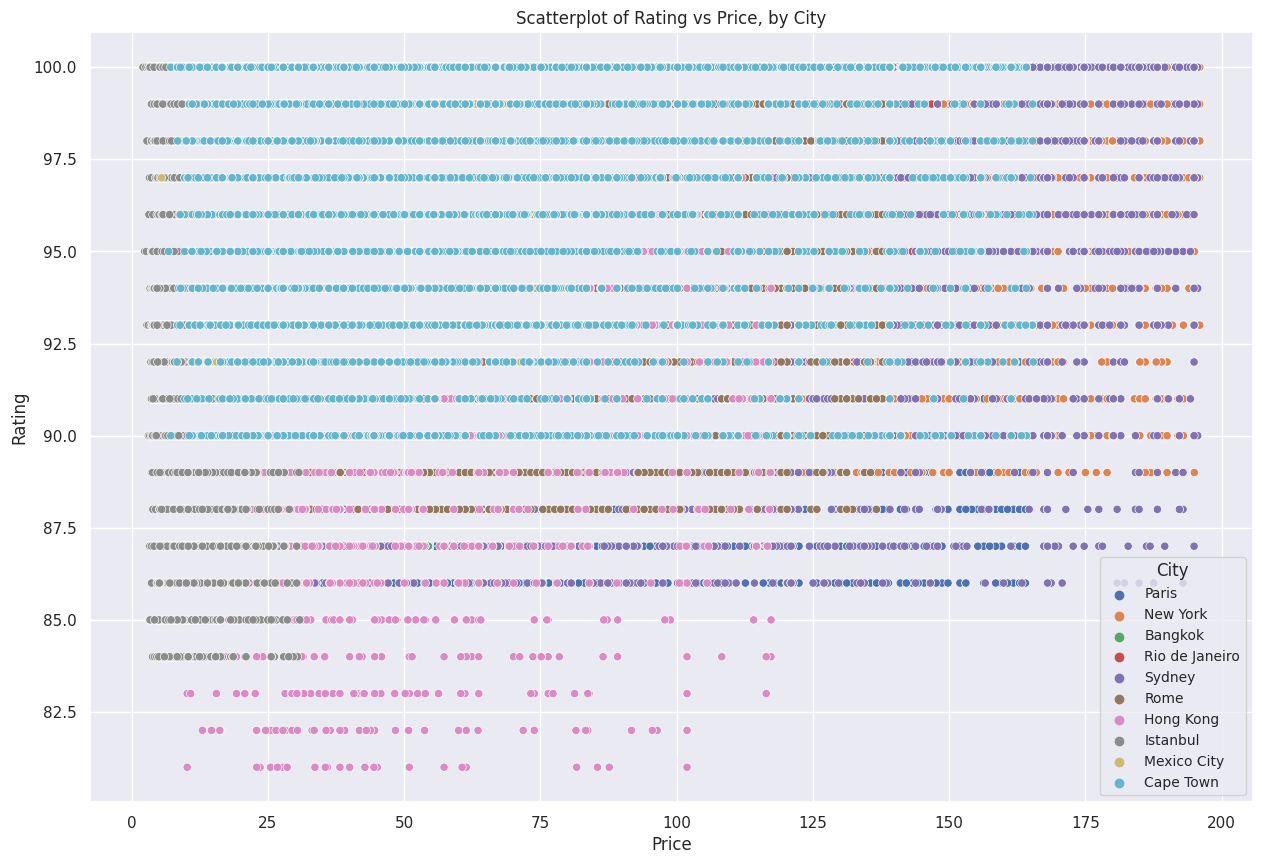

In [ ]:
#Create the scatter plot
warnings.filterwarnings('ignore') # Do this for no_outliers calculatopm
sns.set(rc={'figure.figsize': (15, 10)})

# Remove outliers
scatter_df = listings_pop_df[["price", "city", "review_scores_rating"]]
scatter_df = remove_outliers_by_city(scatter_df, cities_list, "price")
scatter_df = remove_outliers_by_city(scatter_df, cities_list, "review_scores_rating")

sns.scatterplot(x = "price", y = "review_scores_rating", hue = "city", data = scatter_df)
plt.legend(title = "City", fontsize = 'small')
plt.title("Scatterplot of Rating vs Price, by City")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

#Allow warnings again
warnings.filterwarnings('default')


From the scatter plot above, we can definitely see clusters of data by city. Hong Kong in particular sticks out as having particularly low ratings, while Cape Town seems relatively inexpensive, and dominates the part of the graph for high ratings. New York and Sydney seem to dominate the part of the graph for high rating and high price. 


Another interesting note is that we get the ratings in horizontal bands because the ratings are all distinct integers.

## Rating Analysis

We will next analyze the ratings columns, which include an overall rating score and six sub-rating columns including scores for accuracy, cleanliness, check-in, commmunication, location, and value. The overall rating is on a scale from 0-100 whereas the sub-ratings are on a scale from 0-10. Therefore, we perform a quick transformation to put all ratings on a scale of 0-100 and rename columns to make them a bit more intuitive.

In [ ]:
# Extract all rating columns
ratings_extract = reviews_listing_df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                                      'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                                      'review_scores_value']]

# store sub category columns in list to use for transformation                                      
rating_cols = ['review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 
               'review_scores_communication', 'review_scores_location','review_scores_value']                                      

# rename columns to make plots cleaner
ratings_extract = ratings_extract.rename(columns={"review_scores_rating": "Overall", "review_scores_accuracy": "Accuracy",
                                'review_scores_cleanliness': 'Cleanliness', 'review_scores_checkin': 'Check-in',
                                'review_scores_communication': 'Communication', 'review_scores_location': "Location",
                                'review_scores_value': 'Value'})

# drop na values
ratings_extract = ratings_extract.dropna()


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Distribution of Rating Scores and Subscores


We want to get a better feel of how our ratings scores are broken down. One thing we noticed early was that most listings in our dataset were above 90, so for a lot of our graphs, we ruled out the values below that for better visualizations. We will now work on visualizing two things. First, We want to see the count of overall ratings to see the distribution more clearly. We extract out all listings that have an overall rating score of 90+ (this encompasses the vast majority of the data) and then plot a histogram to see the count of listings that fall under each score between 90 and 100. We see that the vast majority have a perfect score of 100 while scores between 90-99 are distributed relatively evenly. Second, we look at the distribution of subrating categories. We plot the rating on the x-axis and hue by each of the six sub categories. We only plot those with rating above 6 as there are very few that fall below this threshold. The scores are generally very high as we saw before, but this shows us more visually that cleanliness and value are more likely to be rated lower while check-in and communication are the most likely to garner perfect scores.

*Note that the overall rating score is provided on a scale of 1-100 while the sub-category scores are provided on a scale of 1-10*

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



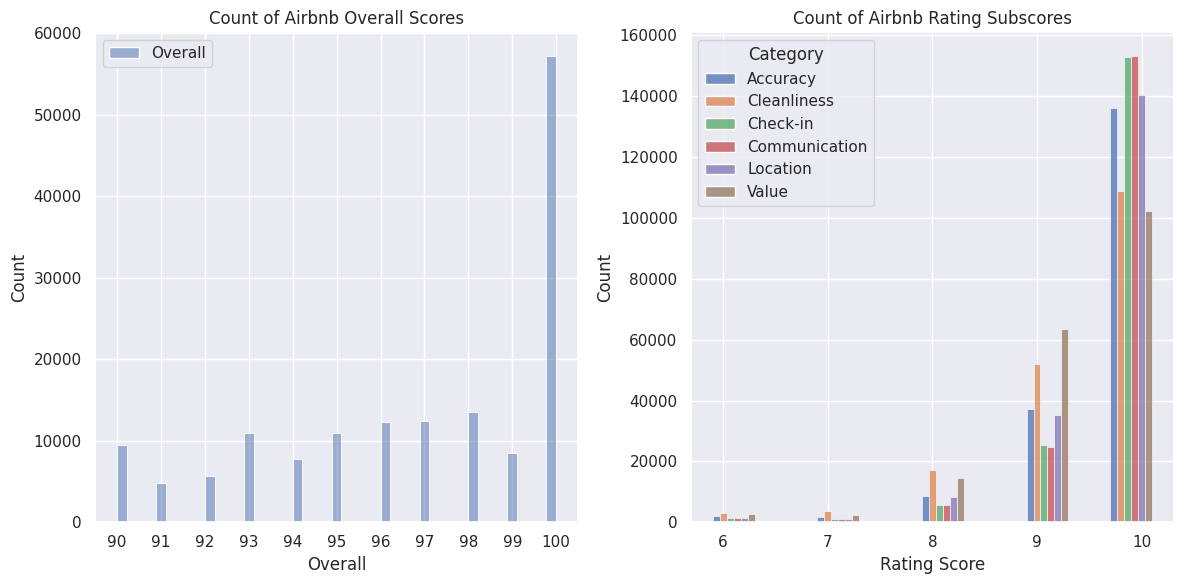

In [ ]:
#plot layout
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#Plot 1
# extract listings with overall ratings >= 90
ratings_extract_90 = ratings_extract[ratings_extract['Overall'] >= 90]

# create histogram to view the count of listings falling under each score from 90-100
rating_hist_90 = sns.histplot(data=ratings_extract_90[['Overall']], ax = ax[0])


#Set title and x/y labels
ax[0].set_title('Count of Airbnb Overall Scores')
ax[0].set(xlabel = 'Overall')
ax[0].set_xticks(ratings_extract_90['Overall'].sort_values(ascending=True).unique())

#Plot 2
# use melt function to be able to hue by category
ratings_extract_melt = ratings_extract.drop(columns=['Overall']).melt()

# only get those with scores >= 6 to make plot easier to visualize
ratings_extract_melt = ratings_extract_melt[ratings_extract_melt['value'] >= 6]

# create histogram plot 
ratings_extract_melt = ratings_extract_melt.rename(columns={'variable': 'Category', 'value': 'Rating Score'})
melt = sns.histplot(ratings_extract_melt, x='Rating Score', hue='Category',
             multiple='dodge', shrink=2, bins=20, ax = ax[1]);
ax[1].set_title('Count of Airbnb Rating Subscores')
ax[1].set_xticks(ratings_extract_melt['Rating Score'].sort_values(ascending=True).unique())     

plt.tight_layout()
plt.show()

### Correlation Map between Rating Scores

We next create a correlation heatmap between all of the various rating scores. This allows for a nice visualization of which sub-categories may have the greatest impact on the overall rating score. It appears accuracy and value have the greatest correlation with overall rating, while location is clearly the least correlated with the overall rating. 

This is an interesting finding and seems to make sense with our intuition. Airbnb consumers generally pick out the location they want to visit independently of choosing their Airbnb, so it's unlikely the location is going to be used to judge their opinion of the Airbnb. Conversely, it makes sense that accuracy and value correlate the most with overall rating. Consumers will likely be more happy with their overall Airbnb experience if they feel as though the listing information was accurate and that they received good value based on what they spent for the Airbnb.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



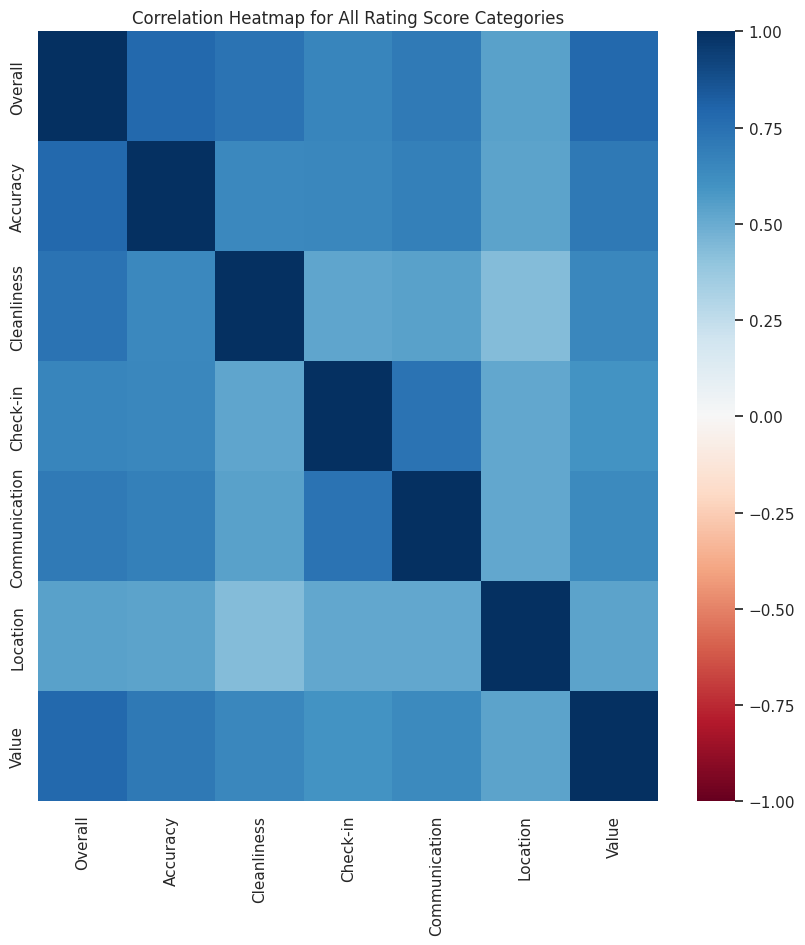

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
corr_mat = ratings_extract.corr()
heat_map = sns.heatmap(corr_mat, cmap='RdBu', vmin= -1, vmax = 1)
heat_map.set(title='Correlation Heatmap for All Rating Score Categories')
heat_map = heat_map

# **Modeling**

## Regression Models

### Linear Regression for Predicting Airbnb Prices

The first modeling task we will perform is simple Linear Regression where the goal will be to predict prices of Airbnb listings. We intend to use many of the features in the dataset, but have strategically decided on some to omit. For example, we have omitted a few of the categorical columns for which there are too many unique values like district, neighbourhood, and property type. In addition, we will omit the 'name' of the listing as well as the listing and host IDs which don't have any relationship to the price. Lastly, we omit a few columns that we saw from our earlier feature corrleation heat map were highly correlated with others. For example, the value, cleanliness, communication, and accuracy scores were all very highly correlated with the overall rating score.

In addition, we made the decision to drop outlier prices because the presence of outliers causes the model to be very inaccurate. We decided on a removal strategy of computing the IQR (75 percentile price - 25 percentile price) and removing any prices above Q3 + $\frac{1}{2} * $ IQR and any prices below Q1 - $\frac{1}{2} * $ IQR. We also removed any rows that had NA values from this analysis, leaving us with roughly 80,000 records. Upcoming we show a strategy for imputation and run the same analysis over the imputed dataset for comparison.


In [ ]:
# We will need to extract labels and features

# drop columns that will not be useful like ids and categorical columns with too many unique values
features = listings_df.drop(columns=['listing_id', 'host_id', 'name', 'district', 'host_location','neighbourhood',
                                     'host_since', 'property_type', 'review_scores_value', 'review_scores_cleanliness',
                                     'review_scores_communication', 'review_scores_accuracy'])

# remove outliers
q1_price = float(features['price'].quantile(0.25))
q3_price = float(features['price'].quantile(0.75))
iqr_price = q3_price - q1_price
fence_low = q1_price-.5*iqr_price
fence_high = q3_price+.5*iqr_price
features = features[(features['price'] > fence_low) & (features['price'] < fence_high)]


# one hot encode categorical columns
feature_dummies = pd.get_dummies(features[['city', 'room_type', 'host_response_time']])

# replace categorical columns with one hot encoded version
features = pd.concat([features.drop(columns=['city', 'room_type', 'host_response_time']), feature_dummies], axis=1)

# drop rows with missing data
features = features.dropna()

# extract the target labels and drop from features
target = features['price']
features = features.drop(columns=['price'])

# We must split our data into training and test sets
# We will use 80% of the data for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

After engineering our features and splitting our test and training sets, we fit a simple Linear Regression model below. We evaluate the performance using the r-squared score and the root mean squared error (RMSE). 

The r-squared value essentially provides a measure of how close our data points are to our fittend regression line. More technically, it is the proportion of variation in the dependent variable that is explained by the independent variable. 

RMSE, meanwhile, provides a better quantitative measure of how accurate our model is. The RMSE is calculated by squaring each residual (difference between actual and predicted value for a particular instance), summing all these squared residuals for each instance, taking the average of this number over all rows and then taking the square root of this squared residual average. We are left with an estimate of on average how far our predictions are off from  the true value.

The two metrics specified above are the best fit for this specific task, while metrics like a confusion matrix or accuracy score wouldn't be particularly useful. This is due to the fact that Airbnb price is a continuous data field which can take on any number. Our model won't be able to predict prices exactly correct, but we more so want to measure how closely our model's price prediction comes to the actual price.

We see from the output that our model has an r-squared score of approximately 0.53 and a root mean squared error of roughly 24. This means that our model explains a little bit more than half of the variation in the price and is generally within $24 on average with each prediction. This model is far from perfect but overall this is not a bad output for a baseline model.

In [ ]:
# We will now fit a simple linear regression model on the training data
clf_lin = LinearRegression()
clf_lin.fit(x_train, y_train)

# get the predictions from the test set
y_pred_lin = clf_lin.predict(x_test)

# get the r-squared and mean squared error
lin_r2 = r2_score(y_test, y_pred_lin)
lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print(f'The r-squared score is {round(lin_r2, 5)}.')
print(f'The root mean squared error is {round(lin_rmse, 5)}.')

The r-squared score is 0.52865.
The root mean squared error is 24.47014.


#### Linear Regression with Imputed Data

Now, we will try to use imputing instead of dropping NA values. We will use simple imputing based on mean for the numeric columns and probabilistic based imputing for the categorical columns. We see there is only one categorical column, *host_response_time*, which needs imputing. We took a probablistic based approach for imputing these values based on how often each of the 4 unique values appeared in those rows where this column was not NA. 

In [ ]:
# We will need to extract labels and features

# drop columns that will not be useful like ids and categorical columns with too many unique values
features_imputed = listings_df.drop(columns=['listing_id', 'host_id', 'name', 'district', 'host_location','neighbourhood',
                                     'host_since', 'property_type', 'review_scores_value', 'review_scores_cleanliness',
                                     'review_scores_communication', 'review_scores_accuracy'])

# remove outliers
q1_price = float(features_imputed['price'].quantile(0.25))
q3_price = float(features_imputed['price'].quantile(0.75))
iqr_price = q3_price - q1_price
fence_low = q1_price-.5*iqr_price
fence_high = q3_price+.5*iqr_price
features_imputed = features_imputed[(features_imputed['price'] > fence_low) & (features_imputed['price'] < fence_high)]

# count number of NAs in city, room_type, host_response_time
city_na = features_imputed['city'].isna().sum()
room_type_na = features_imputed['room_type'].isna().sum()
host_response_time_na = features_imputed['host_response_time'].isna().sum()

print(f'city has {city_na} NA values.')
print(f'room_type has {room_type_na} NA values.')
print(f'host_response_time has {host_response_time_na} NA values.')

city has 0 NA values.
room_type has 0 NA values.
host_response_time has 107144 NA values.


Here we find the probability distribution of the four unique values in the *host_response_time* column and utilize a probabilistic based random value generator approach to impute the missing values. 

In [ ]:
# getting the distribution of values for host_response_time
total_notna = features_imputed['host_response_time'].notna().sum()
win_hour = len(features_imputed[features_imputed['host_response_time'] == 'within an hour'])
win_hours = len(features_imputed[features_imputed['host_response_time'] == 'within a few hours'])
win_days = len(features_imputed[features_imputed['host_response_time'] == 'a few days or more'])
win_day = len(features_imputed[features_imputed['host_response_time'] == 'within a day'])

# computing probabilities
prob_hour = 100*(win_hour / total_notna)
prob_hours = 100*(win_hours / total_notna)
prob_days = 100*(win_days / total_notna)
prob_day = 100*(win_day / total_notna)

# function to impute the values based on random number approach
def impute_host_response_time(x):
  if pd.isna(x): 
    num = random.randint(1,100)
    if num <= prob_hour:
      return 'within an hour'
    elif num > prob_hour and num <= prob_hour+prob_hours:
      return 'within a few hours'
    elif num > prob_hour+prob_hours and num <= prob_hour+prob_hours+prob_days:
      return 'a few days or more'
    else:
      return 'within a day'
  else:
    return x

# update host_resposne_time column based on result of our probabilistic imputing 
features_imputed['host_response_time'] = features_imputed['host_response_time'].apply(impute_host_response_time)


Next we impute the numeric values using the median strategy, allowing for any missing value to be replaced by the median value of that particular feature. We chose to use Simple Imputing because K-Nearest Neighbor Imputing was computationally too expensive. We also chose to use the median strategy as we thought that was the most balanced way to impute as opposed to the other options of mean or most frequent. Our concern with mean was that outliers would cause the mean to not be representative of the true values of the features, so we think median will be a good compromise and help produce the best possible results for our model.

In [ ]:
# Extact numeric features
numeric_features = features_imputed.drop(columns=['host_response_time', 'city', 'room_type'])

# Impute the values of missing numeric features using mean strategy
imputer = SimpleImputer(strategy='median')
features_imputed_temp = pd.DataFrame(imputer.fit_transform(numeric_features))
features_imputed_temp.columns = numeric_features.columns
features_imputed_temp.index = numeric_features.index

# add back in the categorical columns
features_imputed = pd.concat([features_imputed[['city', 'room_type', 'host_response_time']], features_imputed_temp], axis=1)

# one hot encode categorical columns
feature_dummies = pd.get_dummies(features_imputed[['city', 'room_type', 'host_response_time']])

# replace categorical columns with one hot encoded version
features_imputed = pd.concat([features_imputed.drop(columns=['city', 'room_type', 'host_response_time']), feature_dummies], axis=1)

# extract the target labels and drop from features
target = features_imputed['price']
features_imputed = features_imputed.drop(columns=['price'])

# We must split our data into training and test sets
# We will use 80% of the data for training and 20% for testing
x_train_impute, x_test_impute, y_train_impute, y_test_impute = train_test_split(features_imputed, target, test_size=0.2)

We notice from the output below that our resulting model with the imputed data performs slightly worse than our original model with the NAs removed in both r-squared and RMSE. This isn't completely surprising as we used a simple approach of just imputing the median value of the given feature into all slots that were missing data. Perhaps with more computational resources we could have improved this performance with a more robust imputing strategy like K-nearest neighbors imputing. 

In [ ]:
# We will now fit a simple linear regression model on the training data
clf_lin = LinearRegression()
clf_lin.fit(x_train_impute, y_train_impute)

# get predictions from the test set
y_pred_impute = clf_lin.predict(x_test_impute)

# get the r-squared and mean squared error
lin_r2_impute = r2_score(y_test_impute, y_pred_impute)
lin_rmse_impute = np.sqrt(mean_squared_error(y_test_impute, y_pred_impute))

print(f'The r-squared score is {round(lin_r2_impute, 5)}.')
print(f'The root mean squared error is {round(lin_rmse_impute, 5)}.')

The r-squared score is 0.49367.
The root mean squared error is 25.61132.


#### Elastic Net Regression

We previously fit a simple Linear Regression model for predicting Airbnb prices. We will now build upon this model by introducing regularization. The concept of regularization is important and useful because it helps reduce overfitting of a regression model to its training data, and can also help reduce multicollinearity. It achieves this by introducing penalty terms, L1 for Lasso and L2 for Ridge, which helps reduce variance of the model at the expense of adding bias. This reduction in variance helps reduce overfitting.

Below, we will utilize Elastic Net regularization which combines the best of Lasso and Ridge. We figured it would make the most sense to try to combine both regularization techniques in order to hopefully get the most benefit from regularization. We fit a default Elastic Net model to our scaled training data and make predictions on the scaled testing data. We use the StandardScaler library in order to scale the data since Linear Regression with regularization is not scale invariant. Unfortunately, this does not yield a better r-squared score or RMSE than our standard Linear Regression model.

In [ ]:
# Must handle the fact that regularization is not scale invariant
scale = StandardScaler()
x_scale_train = scale.fit_transform(x_train)
x_scale_test = scale.transform(x_test)

# fit a base elastic net regression model on the training data
clf_en = ElasticNet(random_state=42)
clf_en.fit(x_scale_train, y_train)

# get predictions from the test set
y_pred = clf_en.predict(x_scale_test)

# get the r-squared and mean squared error
en_r2 = r2_score(y_test, y_pred)
en_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'The r-squared score is {round(en_r2, 5)}.')
print(f'The root mean squared error is {round(en_rmse, 5)}.')

The r-squared score is 0.46191.
The root mean squared error is 26.14528.


Next, we attempt to tune the hyperparameters for our Elastic Net model to see if we can improve our model's performance. We utilize cross-validation by leveraging the GridSearchCV library in order to perform an exhaustive search over the specified parameter values. We tried out different combinations of alpha, max iterations and L1 Ratio and notice that this successfully increases the r-squared and reduces RMSE compared to our default Elastic Net model. However, the addition of regularization did not show improvement over the base Linear Regression model, indicating that multicollinearity and overfitting may not be a major issue with our base model.

In [ ]:
# WARNING: THIS CELL TAKES 5-10 MINUTES TO RUN

# create the grid parameter with the hyperparameters and values we wish to tune
param_grid = {
    'alpha': [0.2, 0.4, 0.6, 0.8, 1],
    'max_iter': [100, 500, 1000, 1200, 1500, 1700, 2000],
    'l1_ratio': [0.2, 0.4, 0.6, 0.8] 
}
# create the base Elastic Net model
en = ElasticNet()

# instantiate the grid search model and fit
grid_search = GridSearchCV(estimator = en, param_grid = param_grid)
grid_search.fit(x_scale_train, y_train)

# extract best estimator from the grid search and use it to predict
top_en_tune = grid_search.best_estimator_
y_pred = top_en_tune.predict(x_scale_test)

# get r-squared and mean squared error for our predictions
en_r2_tune = r2_score(y_test, y_pred)
en_rmse_tune = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'The r-squared score is {round(en_r2_tune, 5)}.')
print(f'The root mean squared error is {round(en_rmse_tune, 5)}.')

The r-squared score is 0.52621.
The root mean squared error is 24.53345.


#### Linear Regression with PCA

We will next attempt to use PCA in order to see if reducing the dimensionality of the dataset will help lead to models with better accuracy. We noticed that there were many features that appeared to be correlated with each other in our feature correlation matrix, so our hope is that PCA can allow us to cut out some of those extra features and thus reduce the noise of those correlated variables. 

First, we must address the fact that PCA is not scale invariant. We will make use of scikit learn's StandardScaler library in order to remove the mean and scale the data to unit variance. 

Then, we will compute the cumulative explained variance and plot that against the number of components to see how many components will be sufficient to keep for our final model. 

*Note that much of the code related to PCA in this section was re-used from Aaron's HW4 notebook and adapted to fit the current data. We have cited this as comments at the top of each code block*

In [ ]:
# Citing Aaron's HW4 Notebook for this bit of PCA Code

# First must address the fact that PCA is not scale invariant
scale = StandardScaler()
x_pca_scale = scale.fit_transform(x_train)

# Instantiate and Fit PCA
pca = PCA()
x_pca = pca.fit_transform(x_pca_scale)

explained_variance_ratios = pca.explained_variance_ratio_

# Compute cumulative explained variance ratios
cum_evr = np.zeros(len(explained_variance_ratios))
for i in range(len(explained_variance_ratios)):
  if i == 0:
    cum_evr[i] = explained_variance_ratios[i]
  else:
    cum_evr[i] = explained_variance_ratios[i] + cum_evr[i-1]

We set a horizontal line at 0.9 in order to see how many components are able to explain 90% of the variance in the data. We believe this will be a good cut-off in order to capture most of the variance while being able to get out a number of components. We see from the plot that the cumulative explained variance line intersects with our 90% line at around 34 components, thus we will use this as the cut-off for our upcoming modeling section. 

Lastly, we note from the plot that is appears 100% of the variance is explained by roughly 45 components.

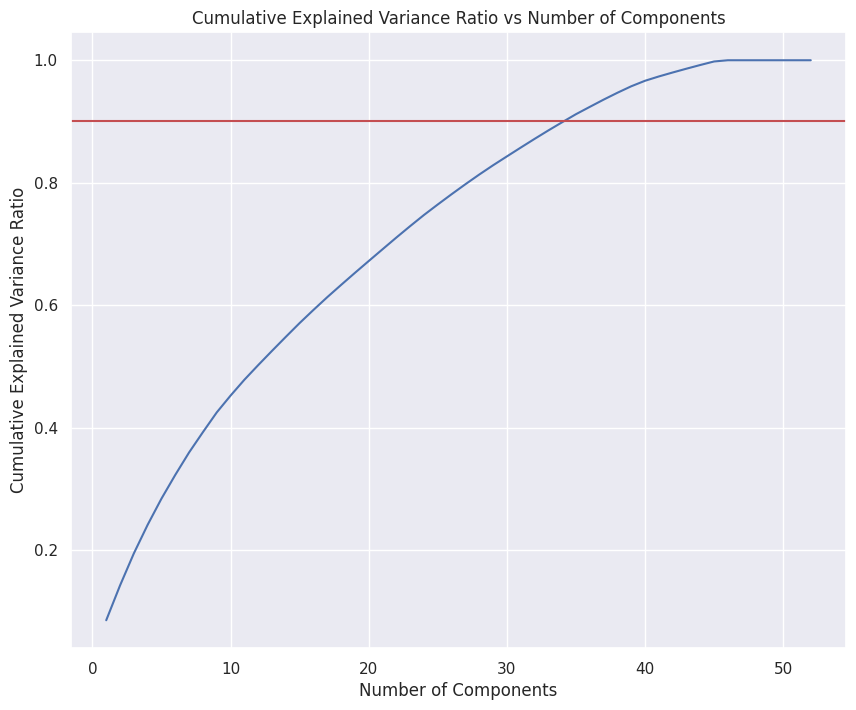

In [ ]:
# Citing Aaron's HW4 Notebook for this bit of PCA Code

# create the values for the x axis
xvals = [i+1 for i in range(len(cum_evr))]

# set figure size
sns.set(rc={'figure.figsize':(10,8)})

# create plot and set title
pca_plot = sns.lineplot(y=cum_evr, x=xvals)
pca_plot.set(title='Cumulative Explained Variance Ratio vs Number of Components', xlabel='Number of Components', ylabel='Cumulative Explained Variance Ratio')

# create the horizontal 90% variance line
plt.axhline(y = 0.9, color='r')
pca_plot = pca_plot

Below, we run our PCA procedure with the 34 components we identified as the cut-off point in our previous analysis. We then fit/transform our training data and transform our testing data as well. Lastly, we fit our Linear Regression model to this newly scaled data and compute predictions on the new test set as well. 

We see this also doesn't show any improvement over the ordinary Linear Regression model in terms of its metrics. It seems as if we will need to utilize a more robust modeling algorithm in order to get better predictions.  

In [ ]:
# Citing Aaron's HW4 Notebook for this bit of PCA Code

# instantiate PCA with number of components specified above
pca = PCA(n_components=34)
x_train_pca = pca.fit_transform(x_pca_scale)

# transform on testing set 
x_pca_test_scale = scale.transform(x_test)
X_test_pca = pca.transform(x_pca_test_scale)

In [ ]:
# instantiate and fit base model
clf_lin = LinearRegression()
clf_lin.fit(x_train_pca, y_train)

# get predictions from model on test set
y_pred = clf_lin.predict(X_test_pca)

# compute metrics for r-squared and rmse
lin_r2_pca = r2_score(y_test, y_pred)
lin_rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'The r-squared score is {round(lin_r2_pca, 5)}.')
print(f'The root mean squared error is {round(lin_rmse_pca, 5)}.')

The r-squared score is 0.46519.
The root mean squared error is 26.0656.


We ultimately notice that none of the techniques to address multicollinearity or overfitting helped drive lower root mean squared error over our ordinary least squares regression model, indicating that these may not be problems with our base Linear Regression model. We'll next explore more robust ensemble methods to see if we can create a model that improves upon the base Linear Regression model.

### Random Forest Regression for Predicting Airbnb Prices

We will next build upon our model for predicting prices by introducing a Random Forest Regression model. Random Forest is an ensemble based model, which combines several predictors in order to build a robust final predictor. This method of modeling makes use of a technique called bagging, where we repeatedly draw random subsets of the data with replacment. Through each iteration it creates a decision tree using a specified number of features without replacement. This process is repeated many times in order to ensure there is diversity in how the model is being trained. Finally, the algorithm uses majority voting (in the case of classification) or averaging (in the case of regerssion) to predict the class for any test data that comes in.

Random Forest is a proven robust machine learning classifier that is widely used, thus, we expect to see an improvement over ordinary Linear Regression in both r-squared and root mean squared error.

Our expectation is confirmed by the metrics that were outputted by this model. We see an r-squared score around 0.70 which is roughly 30% higher than what we saw with the Linear Regression model. Similarly the Random Forest model reduced root mean squared error by about 20% compare to the Linear Regression model.

In [ ]:
# instantiate and fit base model
clf_rf = RandomForestRegressor()
clf_rf.fit(x_train, y_train)

# get predictions from model on test set
y_pred_rf = clf_rf.predict(x_test)

# compute metrics for r-squared and rmse
lin_r2_rf = r2_score(y_test, y_pred_rf)
lin_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'The r-squared score is {round(lin_r2_rf, 5)}.')
print(f'The root mean squared error is {round(lin_rmse_rf, 5)}.')

The r-squared score is 0.69683.
The root mean squared error is 19.62514.


#### Hyperparameter Tuning

We next incorporate some hyperparameter tuning by trying out different combinations of estimators and maximum depth. We find the combination that yields the lowest root mean squared error and highest r-squared value. Typically, this occurred with larger number of estimators and max depth. We see below that the maximum values we tested, 200 estimators at 20 max depth, yielded the best metrics.

In [ ]:
# TAKES ROUGHLY 10 MINUTES TO RUN

# initialize variables to keep track of best values
rf_r2_best = -1
rf_mse_best = -1
best_depth = 0
best_est = 0

# traverse through various values for estimators and max depth
for i in range (100, 201, 50):
  for j in range(5, 21, 5):
    # fit model
    rf = RandomForestRegressor(n_estimators=i, max_depth=j)
    rf.fit(x_train, y_train)

    # get predictions from test data
    y_pred = rf.predict(x_test)

    # compute r-squared score
    rf_r2 = r2_score(y_test, y_pred)
    
    # update best we've seen if r-square score is greater than the highest we've seen so far
    if rf_r2 > rf_r2_best and rf_r2 < 1:
      rf_r2_best = rf_r2
      rf_mse_best = np.sqrt(mean_squared_error(y_test, y_pred))
      best_est = i
      best_depth = j

print(f'The r-squared score is {round(rf_r2_best, 5)}.')
print(f'The root mean squared error is {round(rf_mse_best, 5)}.')
print(best_depth)
print(best_est)
    

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The r-squared score is 0.70178.
The root mean squared error is 19.53728.
20
200


### Linear Regression for Predicting Airbnb Ratings

The next regression modeling we will do is to build a model that can be used to predict the overall rating of an Airbnb listing. We will start off with a base linear regression model and use a similar approach to our prior price modeling section in regards to the features we will use in our model and the metrics we will use to measure success.

We will start with extracting the features, which will largely mirror what we did in the prior modeling section where we predicted price. The main change is that we will not remove the sub-category rating scores (i.e. value score, cleanliness score, communication score, etc.). Our rationale for removing these features in the price prediction is that they were largely correlated with overall rating which we used as a feature in that model. However, overall rating is now the target value so we will want to include these category scores as features in this model since they have high predictive value for overall rating score. 

In [ ]:
# drop columns that will not be useful like ids and categorical columns with too many unique values
features = listings_df.drop(columns=['listing_id', 'host_id', 'name', 'district', 'host_location','neighbourhood',
                                     'host_since', 'property_type'])

# one hot encode categorical columns
feature_dummies = pd.get_dummies(features[['city', 'room_type', 'host_response_time']])

# replace categorical columns with one hot encoded version
features = pd.concat([features.drop(columns=['city', 'room_type', 'host_response_time']), feature_dummies], axis=1)

# drop rows with missing data
features = features.dropna()

# extraact the target labels and drop from features
target = features['review_scores_rating']
features = features.drop(columns=['review_scores_rating'])

# We must split our data into training and test sets
# We will use 80% of the data for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

We now fit our base Linear Regression model on the training data and use it to predict ratings from listings in the test data. For the same reasons as with our price modeling section, we decide to use r-squared and root mean squared error to measure success of our model.

We see a rather strong r-squared score and a low root mean squared error. It makes sense that this model would perform better than our price prediction model for a couple of reasons. The first reason being that the values that a rating can take on are bounded by 0-100 whereas the range of values a price can take on is much larger. Additionally, we saw from our EDA that the ratings were not widely distributed. The vast majority of ratings were greater than 95 so it's much easier for our model to make closer predictions when the metric we are predicting is hardly varying.

In [ ]:
# We will now fit a simple linear regression model on the training data
clf_lin = LinearRegression()
clf_lin.fit(x_train, y_train)

# get the predictions from the test set
y_pred = clf_lin.predict(x_test)

# compute the r-squared and mean squared error values from our predictions
lin_r2 = r2_score(y_test, y_pred)
lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'The r-squared score is {round(lin_r2, 5)}.')
print(f'The root mean squared error is {round(lin_rmse, 5)}.')

The r-squared score is 0.78609.
The root mean squared error is 4.29667.


#### Linear Regression with Imputed Data

We next will fit the same model but this time on the imputed version of our dataset. We will utilize the same strategy as before where we impute missing categorical variables based on the frequency each value appeared in the non-missing data and we will impute the missing numerical data with median values.

In [ ]:
# We will need to extract labels and features

# drop columns that will not be useful like ids and categorical columns with too many unique values
features_imputed = listings_df.drop(columns=['listing_id', 'host_id', 'name', 'district', 'host_location','neighbourhood',
                                     'host_since', 'property_type'])


# getting the distribution of values for host_response_time
total_notna = features_imputed['host_response_time'].notna().sum()
win_hour = len(features_imputed[features_imputed['host_response_time'] == 'within an hour'])
win_hours = len(features_imputed[features_imputed['host_response_time'] == 'within a few hours'])
win_days = len(features_imputed[features_imputed['host_response_time'] == 'a few days or more'])
win_day = len(features_imputed[features_imputed['host_response_time'] == 'within a day'])

# computing probabilities
prob_hour = 100*(win_hour / total_notna)
prob_hours = 100*(win_hours / total_notna)
prob_days = 100*(win_days / total_notna)
prob_day = 100*(win_day / total_notna)

# function to impute the values based on random number approach
def impute_host_response_time(x):
  if pd.isna(x): 
    num = random.randint(1,100)
    if num <= prob_hour:
      return 'within an hour'
    elif num > prob_hour and num <= prob_hour+prob_hours:
      return 'within a few hours'
    elif num > prob_hour+prob_hours and num <= prob_hour+prob_hours+prob_days:
      return 'a few days or more'
    else:
      return 'within a day'
  else:
    return x

# update host_resposne_time column based on result of our probabilistic imputing 
features_imputed['host_response_time'] = features_imputed['host_response_time'].apply(impute_host_response_time)

In [ ]:
# Extact numeric features
numeric_features = features_imputed.drop(columns=['host_response_time', 'city', 'room_type'])

# Impute the values of missing numeric features using mean strategy
imputer = SimpleImputer(strategy='median')
features_imputed_temp = pd.DataFrame(imputer.fit_transform(numeric_features))
features_imputed_temp.columns = numeric_features.columns
features_imputed_temp.index = numeric_features.index

# add back in the categorical columns
features_imputed = pd.concat([features_imputed[['city', 'room_type', 'host_response_time']], features_imputed_temp], axis=1)

# one hot encode categorical columns
feature_dummies = pd.get_dummies(features_imputed[['city', 'room_type', 'host_response_time']])

# replace categorical columns with one hot encoded version
features_imputed = pd.concat([features_imputed.drop(columns=['city', 'room_type', 'host_response_time']), feature_dummies], axis=1)

# extract the target labels and drop from features
labels = features_imputed['review_scores_rating']
features_imputed = features_imputed.drop(columns=['review_scores_rating'])

# We must split our data into training and test sets
# We will use 80% of the data for training and 20% for testing
x_train_impute, x_test_impute, y_train_impute, y_test_impute = train_test_split(features_imputed, labels, test_size=0.2)

We see the metrics outputted by the model using the imputed dataset line up closely with those when using the dataset where NA values were dropped.

In [ ]:
  # We will now fit a simple linear regression model on the training data
clf_lin = LinearRegression()
clf_lin.fit(x_train_impute, y_train_impute)

# get predictions from the test set
y_pred_impute = clf_lin.predict(x_test_impute)

# get the r-squared and mean squared error
lin_r2_impute = r2_score(y_test_impute, y_pred_impute)
lin_rmse_impute = np.sqrt(mean_squared_error(y_test_impute, y_pred_impute))

print(f'The r-squared score is {round(lin_r2_impute, 5)}.')
print(f'The root mean squared error is {round(lin_rmse_impute, 5)}.')

The r-squared score is 0.76002.
The root mean squared error is 4.10429.


#### Linear Regression with Regularization

We next fit an Elastic Net model with some hyperparameter tuning incorprated and notice that the outputted metrics are nearly identical to the ordinary Linear Regression model above. We will once again explore another ensembling method in the next section in order to see if we can improve our model's metrics.

In [ ]:
# WARNING: this cell takes awhile to run (~6 mins)

# Must handle the fact that regularization is not scale invariant
scale = StandardScaler()
x_scale_train = scale.fit_transform(x_train)
x_scale_test = scale.transform(x_test)

# Create grid of parameters to test
param_grid = {
    'alpha': [0.2, 0.4, 0.6, 0.8, 1],
    'max_iter': [100, 500, 1000, 1200, 1500, 1700, 2000],
     'l1_ratio': [0.2, 0.4, 0.6, 0.8] 
}

# Create a base model
en = ElasticNet()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = en, param_grid = param_grid, scoring='r2', cv=10)

# fit our models on training data
grid_search.fit(x_scale_train, y_train)

# get best estimator from tuning and use it to predict
top_en_tune = grid_search.best_estimator_
y_pred = top_en_tune.predict(x_scale_test)

# get the r-squared and RMSE values
en_r2_tune = r2_score(y_test, y_pred)
en_rmse_tune = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'The r-squared score is {round(en_r2_tune, 5)}.')
print(f'The root mean squared error is {round(en_rmse_tune, 5)}.')

The r-squared score is 0.78314.
The root mean squared error is 4.32617.


### Gradient Boosting Regression for Predicting Airbnb Ratings

We next will try to introduce Boosting to see if that will help improve the accuracy of our model. The basic idea of boosting is to combine an ensemble of weak learners, that are not much better than random guessing, and sequentially train them on random subsets of the data combined with previously misclassified samples. In each iteration we will correct for prior mistakes until we eventually converge this ensemble of weak learners into a singular robust learner. Here, we decided to use Gradient Boosting, which is a more robust classifier than AdaBoost. It can be adaptable in the loss function that it uses, making it more flexible and less sensitive to outliers than AdaBoost.

We see from the outputted metrics that it provides a slight performance boost over our Linear Regression model, but with such a high baseline to begin with there, may not be a large room for improvement. We will next attempt to tune hyperparameters to see if improvement can be achieved. 

In [ ]:
# instantiate and fit base model
clf_gb = GradientBoostingRegressor()
clf_gb.fit(x_train, y_train)

# get predictions from model on test set
y_pred = clf_gb.predict(x_test)

# compute metrics for r-squared and rmse
gb_r2 = r2_score(y_test, y_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'The r-squared score is {round(gb_r2, 5)}.')
print(f'The root mean squared error is {round(gb_rmse, 5)}.')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The r-squared score is 0.79111.
The root mean squared error is 4.27997.


#### Hyperparameter Tuning

Next, we will explore how varying the number of estimators will impact the RMSE of our model. We test out various values for this parameter and plot both the Training RMSE and Testing RMSE against the number of estimators to see how the root mean squared error varies as the number of boosting stages increases.

In [ ]:
# takes roughly 4-5 mins to run this cell

# define the number of estimators we will test
n_estimators = [25, 50, 75, 100, 125, 150, 175, 200]
train_rmse = []
test_rmse = []

for estimator in n_estimators:
  # fit model with new estimator
  clf_gb = GradientBoostingRegressor(n_estimators = estimator)
  clf_gb.fit(x_train, y_train)

  # get test and training predictions
  y_pred_test = clf_gb.predict(x_test)
  y_pred_train = clf_gb.predict(x_train)

  # compute root mean squared error of test and training predictions
  gb_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
  gb_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

  # append to list for plotting
  train_rmse.append(gb_rmse_train)
  test_rmse.append(gb_rmse_test)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



We see from the plot below that the largest decrease in RMSE occurs when we increase from 25 to 50 estimators. The root mean squared error continues to trend downward on the training data as we increase the number of estimators, but it flattens out much more so with the testing data. It seems like we don't get a ton of benefit in our Test RMSE when we increase the number of boosting stages beyond the default of 100.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



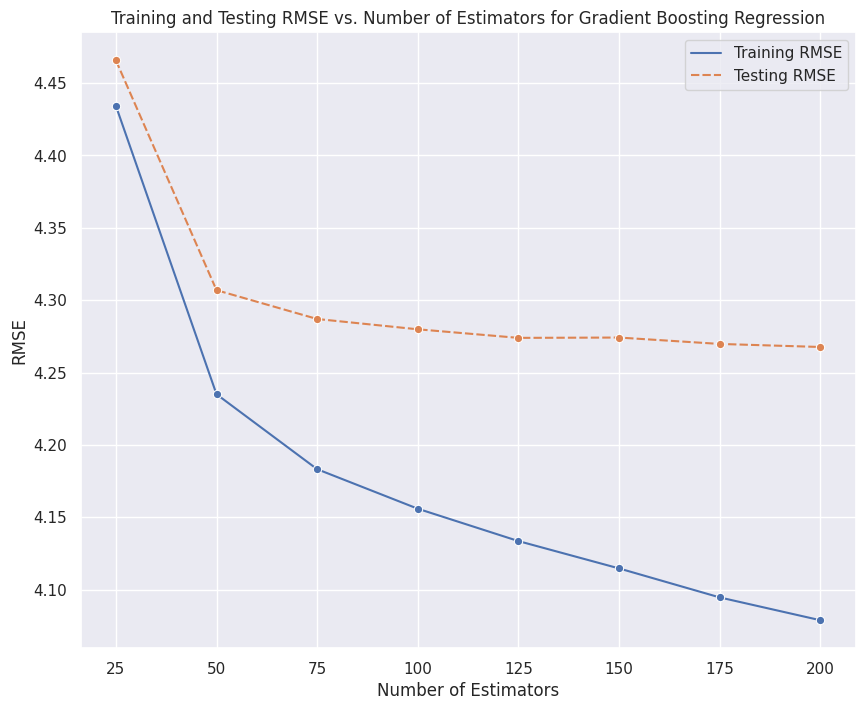

In [ ]:
# convert training and testing RMSE data to a dataframe
gb_tune_df = pd.DataFrame(
    {
     'Training RMSE': train_rmse,
     'Testing RMSE': test_rmse
    })


# create line plot for the RMSE for training and test data
gb_plot = sns.lineplot(data = gb_tune_df, marker='o')
gb_plot.set(xlabel='Number of Estimators', ylabel='RMSE', title = 'Training and Testing RMSE vs. Number of Estimators for Gradient Boosting Regression')
gb_plot.set_xticks(range(len(n_estimators)))
gb_plot.set_xticklabels(n_estimators)
gb_plot = gb_plot

## Classification Models

### Logistic Regression for Binary Classification of Super Hosts

#### Logistic Regression without Imputing

We next try to create a model that can predict whether a particular Airbnb listing is associated with a super host or not. We will start by fitting a Logistic Regression model, which is a good base model to use for binary classification. It is similar to Linear Regression but instead of minimizing mean squared error it attempts to minimize the log cost function via Gradient Descent. The dot product of each features and its weight vector are run through a non-convex Sigmoid function to map the output to a number between 0 and 1. This essentially gives a probability prediction for class membership. If the output for a particular instance is 0.5 or above we will predict it is a member of the class, otherwise we will predict it is not a member. For our initial model we will just remove all NA values rather than imputing.

In [ ]:
# We will need to extract labels and features

# drop columns that will not be useful like ids and categorical columns with too many unique values
features = listings_df.drop(columns=['listing_id', 'host_id', 'name', 'district', 'host_location','neighbourhood',
                                     'host_since', 'property_type', 'review_scores_value', 'review_scores_cleanliness',
                                     'review_scores_communication', 'review_scores_accuracy'])

# one hot encode categorical columns
feature_dummies = pd.get_dummies(features[['city', 'room_type', 'host_response_time']])

# replace categorical columns with one hot encoded version
features = pd.concat([features.drop(columns=['city', 'room_type', 'host_response_time']), feature_dummies], axis=1)

# drop rows with missing data
features = features.dropna()

# extract the target labels and drop from features
labels = features['host_is_superhost'].values
features = features.drop(columns=['host_is_superhost'])

# We must split our data into training and test sets
# We will use 80% of the data for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



We must scale the data in order for the algorithm to converge. We will make use of StandardScaler library in order to scale and transform our data.

In [ ]:
# creating standard scaler instance
scale = StandardScaler()

# scaling and transforming traning data
x_scale_train = scale.fit_transform(x_train)

# transforming test data
x_scale_test = scale.transform(x_test)

# fitting base logistic regression model
log_clf = LogisticRegression()
log_clf.fit(x_scale_train, y_train)

# getting predictions from our test set
y_pred = log_clf.predict(x_scale_test)

# computing the accuracy of our model
log_class_acc = accuracy_score(y_test, y_pred)

print(f'The Logistic Regression Classifier classifies Airbnb super hosts with {round(100*log_class_acc, 2)}% accuracy.')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The Logistic Regression Classifier classifies Airbnb super hosts with 72.51% accuracy.


We see that our Logistic Regression model classifies whether the host of a particular listing is a super host or not with approximately 72% accuracy. We next look at the confusion matrix from the results in order to further analyze the output of our model. It appears the model was much better at predicting that a listing was not associated with a super host compared to predicting that it was associated with a super host. When faced with a listing that is not paired with a super host it predicts this at an accuracy rate of roughly 83%, however, given a listing that is tied to a super host it predicts this correctly only 52% of the time.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



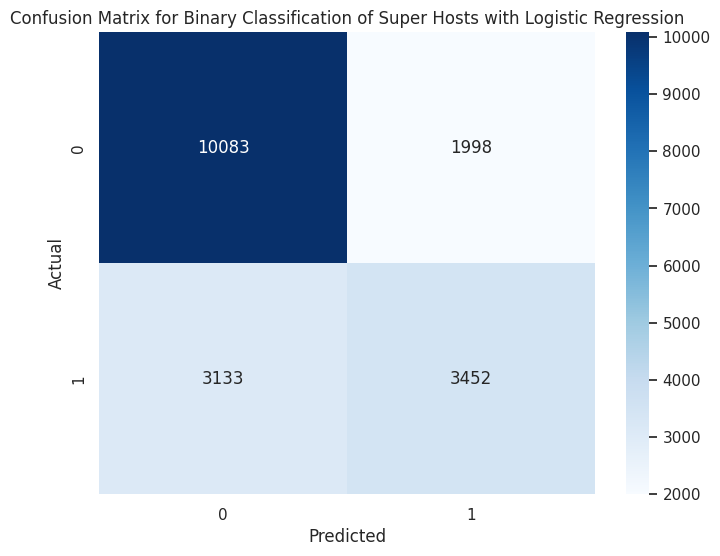

In [ ]:
# creating confusion matrix from our test and prediction data
cm = confusion_matrix(y_test, y_pred)

# setting the window size
sns.set(rc={'figure.figsize':(8,6)})

# creating heat map viewable representation of confusion matrix
cm_heatmap = sns.heatmap(data=cm, annot=True, fmt="g", cmap="Blues")
cm_heatmap.set(title="Confusion Matrix for Binary Classification of Super Hosts with Logistic Regression", xlabel="Predicted", ylabel="Actual")
cm_heatmap = cm_heatmap

#### Logistic Regression with Imputing

Next we will repeat the same procedure but using the imputed data. We'll utilize the same strategy as we did in the prior modeling section where we impute the categorical variables based on relative frequency they appear in the non-NA rows and impute the numeric values based on median.

In [ ]:
# We will need to extract labels and features

# drop columns that will not be useful like ids and categorical columns with too many unique values
features_imputed = listings_df.drop(columns=['listing_id', 'host_id', 'name', 'district', 'host_location','neighbourhood',
                                     'host_since', 'property_type', 'review_scores_value', 'review_scores_cleanliness',
                                     'review_scores_communication', 'review_scores_accuracy'])


# getting the distribution of values for host_response_time
total_notna = features_imputed['host_response_time'].notna().sum()
win_hour = len(features_imputed[features_imputed['host_response_time'] == 'within an hour'])
win_hours = len(features_imputed[features_imputed['host_response_time'] == 'within a few hours'])
win_days = len(features_imputed[features_imputed['host_response_time'] == 'a few days or more'])
win_day = len(features_imputed[features_imputed['host_response_time'] == 'within a day'])

# computing probabilities
prob_hour = 100*(win_hour / total_notna)
prob_hours = 100*(win_hours / total_notna)
prob_days = 100*(win_days / total_notna)
prob_day = 100*(win_day / total_notna)

# function to impute the values based on random number approach
def impute_host_response_time(x):
  if pd.isna(x): 
    num = random.randint(1,100)
    if num <= prob_hour:
      return 'within an hour'
    elif num > prob_hour and num <= prob_hour+prob_hours:
      return 'within a few hours'
    elif num > prob_hour+prob_hours and num <= prob_hour+prob_hours+prob_days:
      return 'a few days or more'
    else:
      return 'within a day'
  else:
    return x

# update host_resposne_time column based on result of our probabilistic imputing 
features_imputed['host_response_time'] = features_imputed['host_response_time'].apply(impute_host_response_time)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Extact numeric features
numeric_features = features_imputed.drop(columns=['host_response_time', 'city', 'room_type'])

# Impute the values of missing numeric features using mean strategy
imputer = SimpleImputer(strategy='median')
features_imputed_temp = pd.DataFrame(imputer.fit_transform(numeric_features))
features_imputed_temp.columns = numeric_features.columns
features_imputed_temp.index = numeric_features.index

# add back in the categorical columns
features_imputed = pd.concat([features_imputed[['city', 'room_type', 'host_response_time']], features_imputed_temp], axis=1)

# one hot encode categorical columns
feature_dummies = pd.get_dummies(features_imputed[['city', 'room_type', 'host_response_time']])

# replace categorical columns with one hot encoded version
features_imputed = pd.concat([features_imputed.drop(columns=['city', 'room_type', 'host_response_time']), feature_dummies], axis=1)

# extract the target labels and drop from features
labels = features_imputed['host_is_superhost'].values
features_imputed = features_imputed.drop(columns=['host_is_superhost'])

# We must split our data into training and test sets
# We will use 80% of the data for training and 20% for testing
x_train_impute, x_test_impute, y_train_impute, y_test_impute = train_test_split(features_imputed, labels, test_size=0.2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



We next repeat the procedure with scaling and transforming the data. Then, we fit the model and fetch the predictions from our test set. We notice that the accuracy is quite a bit better (roughly 10% higher) than it was with the non-imputed data. This makes sense, as it seems like our model should be able to better distinguish between two classes more easily when given more data. 

We see from the confusion matrix that our model may not actually be that great at predicting, as it misclassifies 1 values (super hosts) at very high rates. The false negative rate, where our model classifies the listing as not super-host but it actually is a super-host, is nearly 80%. This signifies that due to the imbalance of super hosts and non super-hosts in the dataset, our model just learns to predict non super-host and that ends up yielding a fairly decent accuracy rate. 

In [ ]:
# creating standard scaler instance
scale = StandardScaler()

# scaling and transforming traning data
x_scale_train = scale.fit_transform(x_train_impute)

# transforming test data
x_scale_test = scale.transform(x_test_impute)

# fitting base logistic regression model
log_clf = LogisticRegression()
log_clf.fit(x_scale_train, y_train_impute)

# getting predictions from our test set
y_pred_impute = log_clf.predict(x_scale_test)

# computing the accuracy of our model
log_class_acc_impute = accuracy_score(y_test_impute, y_pred_impute)

print(f'The Logistic Regression Classifier classifies Airbnb super hosts with {round(100*log_class_acc_impute, 2)}% accuracy.')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The Logistic Regression Classifier classifies Airbnb super hosts with 83.17% accuracy.


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



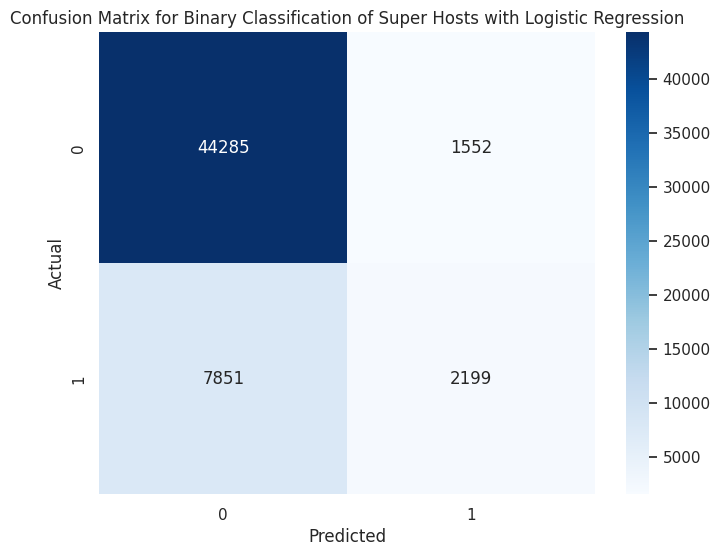

In [ ]:
# creating confusion matrix from our test and prediction data
cm = confusion_matrix(y_test_impute, y_pred_impute)

# setting the window size
sns.set(rc={'figure.figsize':(8,6)})

# creating heat map viewable representation of confusion matrix
cm_heatmap = sns.heatmap(data=cm, annot=True, fmt="g", cmap="Blues")
cm_heatmap.set(title="Confusion Matrix for Binary Classification of Super Hosts with Logistic Regression", xlabel="Predicted", ylabel="Actual")
cm_heatmap = cm_heatmap

### Random Forest Classification for Binary Classification of Super Hosts

Next, we will continue to perform the same classification task with super hosts but now introduce a Random Forest classifier to build upon our base Logistic Regression model. We will start by fitting the classifier on the non-imputed data, that is, the data where we dropped rows with missing values. 

We saw that the Logistic Regression model classified the majority group well but struggled with classifying the minority super host group correctly. On the non-imputed dataset, our Logistic Regression model was barely better than random guessing when it came to classifying super hosts. 

The confusion matrix below with our newly fitted Random Forest model shows a significant improvement when it comes to predicting the super hosts. The true positive rate, also known as recall, for the Random Forest model is 67% compared to 52% for the Logistic Regression model. We see improvements in predicting the minority class without sacrificing accuracy in the majority class, as we notice the accuracy in predicting non-super hosts is very similar to it was with the prior model.

In [ ]:
# instantiate and fit base model
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)

# get predictions from model on test set
y_pred = clf_rf.predict(x_test)

# compute the accuracy score from the predictions
rf_class_acc = accuracy_score(y_test, y_pred)

print(f'The Random Forest Classifier classifies Airbnb super hosts with {round(100*rf_class_acc, 2)}% accuracy.')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The Random Forest Classifier classifies Airbnb super hosts with 81.93% accuracy.


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



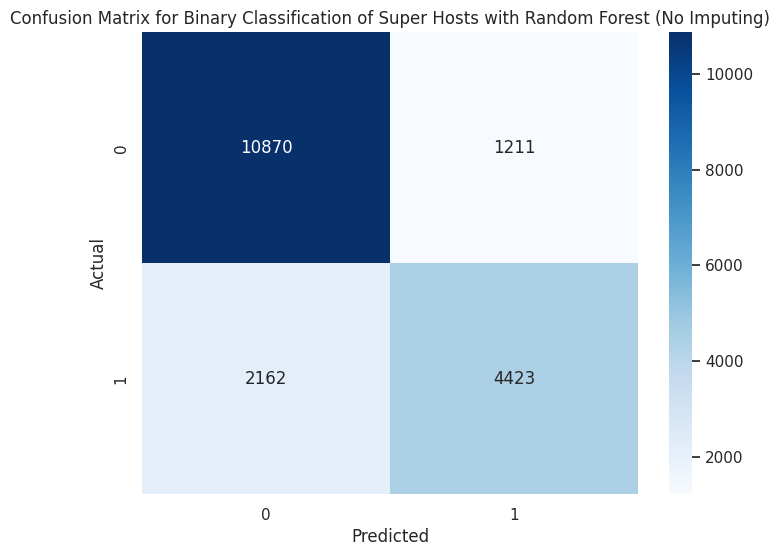

In [ ]:
# creating confusion matrix from our test and prediction data
cm = confusion_matrix(y_test, y_pred)

# setting the window size
sns.set(rc={'figure.figsize':(8,6)})

# creating heat map viewable representation of confusion matrix
cm_heatmap = sns.heatmap(data=cm, annot=True, fmt="g", cmap="Blues")
cm_heatmap.set(title="Confusion Matrix for Binary Classification of Super Hosts with Random Forest (No Imputing)", xlabel="Predicted", ylabel="Actual")
cm_heatmap = cm_heatmap

The Random Forest classifier also performs better than its Logistic Regression classifier using the imputed dataset. We see this model has the best accuracy score of any model and dataset we've used for this classification task, however, it's hard to say this is a better overall model than the Random Forest with the non-imputed dataset. The reason the accuracy looks much higher here is because the imputed dataset introduces many more listings, most of which are non super-hosts. All of the models so far have performed well at classifying the majority group so the more 0 labeled instances introduced with the imputed dataset will inherently boost the accuracy rate of this model.

Nonetheless, this Random Forest model is clearly superior to the Logistic Regression model when comparing models that worked on the same datasets. The Logistic Regression model performed very poorly on the binary 1 class labels with the imputed dataset, garnering a 77% false negative rate. With the Random Forest model the false negative rate is lowered to 47%, meaning this model classifies super-host listings correctly slightly more than half the time, compared to the Logistic Regression model which only classified super-host listings accurately a quarter of the time.

Overall, however, we see the Random Forest model on the non-imputed dataset performs best when classifying super-host listings. This is likely due to the fact that the volume of the imbalance of labels is so high with the imputed dataset that it struggles to learn how to classify the minority super-host label. We make mention of this in the potential next steps section, and unfortuantely did not get to it in this probject, but perhaps to build upon this model and correct the high false negative rates in a future setting it could be a good idea to try upsampling on the minority instances. Nevertheless, it's evident in both cases that the Random Forest model outperforms the Logistic Regression model in this binary classification task. 

In [ ]:
# fit base model on imputed data
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train_impute, y_train_impute)

y_pred_impute = clf_rf.predict(x_test_impute)

# calculate accuracy score of predictions
rf_class_acc_impute = accuracy_score(y_test_impute, y_pred_impute)


print(f'The Random Forest Classifier classifies Airbnb super hosts with {round(100*rf_class_acc_impute, 2)}% accuracy.')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The Random Forest Classifier classifies Airbnb super hosts with 89.31% accuracy.


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



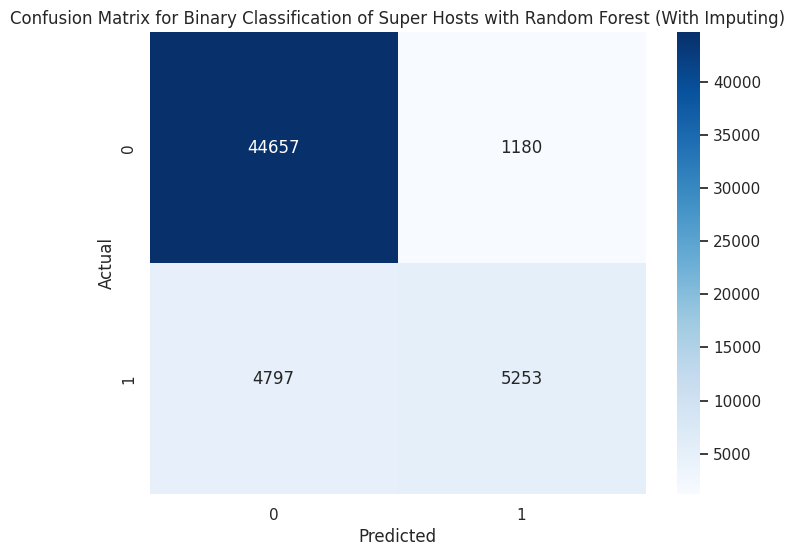

In [ ]:
# creating confusion matrix from our test and prediction data
cm = confusion_matrix(y_test_impute, y_pred_impute)

# setting the window size
sns.set(rc={'figure.figsize':(8,6)})

# creating heat map viewable representation of confusion matrix
cm_heatmap = sns.heatmap(data=cm, annot=True, fmt="g", cmap="Blues")
cm_heatmap.set(title="Confusion Matrix for Binary Classification of Super Hosts with Random Forest (With Imputing)", xlabel="Predicted", ylabel="Actual")
cm_heatmap = cm_heatmap

# Conclusions

## EDA

Most of the key takeaways in our EDA were presented as annotations within each individual section, however, there were a few cool insights that stood out that we wanted to highlight. 

With the binning task within the host analysis, it was interesting to see that hosts with a large number of different listings charge more on average but garner worse ratings. This seems counterintuitive, however, it does make a bit of logical sense as they are likely able to charge more as an established host but they likely do not have the time to dedicate to each of their individual listings which would contribute to lower ratings.

It was also interesting to investigate the various rating sub-categories, such as cleanliness, value, accuracy, etc. We found from the correlation map that accuracy and value had the highest correlation with overall rating while check-in and location were less correlated with the overall rating. This was an interesting insight to keep in mind for Airbnb owners, and something to reflect on the next time we use Airbnb ourselves.

Lastly, the Geography analysis provided some interesting insights in that we did not find any trends with price, rating, and population density. Our intuition was that more densely populated areas would have higher Airbnb prices, but that notion was refuted by the data. Perhaps if we had a larger sample of cities in the dataset we would be able to make stronger conclusions on this topic but it was insightful to see how data can sometimes counter your initial intuition.

## Modeling

There are several takeaways we had from the various models we explored. The first takeaway are the insights we gathered from testing various types of classifiers against each other. We generally followed the flow of fitting a base Regression model and then building upon that with a more robust ensemble model. In all cases we observed that the ensemble model performed the best. With the price prediction task, we found that the Random Forest model garnered the lowest r-squared and root mean squared error. In the ratings prediction task the Gradient Boosting model had the best performance, and in the binary classification of super hosts it was once again the Random Forest classifier that yielded the highest accuracy score. We can conclude that while standard Linear and Logistic Regression are good starting points for modeling tasks, it is likely that you will need to explore ensemble models in order to obtain the best results.

Additionally, while not surprising, we found that it was much harder to build models for highly variable data. We noticed that we built relatively accurate models for prediciting Airbnb ratings and classifying super hosts vs. non super hosts, primarily because the data was not highly variable. As explored in the EDA section, we saw that the ratings were all very high with almost all above 90 and a large amount of 100 ratings. With the super host task, we saw that a vast majority of the listings were associated with non-super hosts. Our model for that task learned to predict the 0 label in the majority of cases which yielded good accuracy results without performing well on the super host class. These are the types of things we need to look out for when performing modeling tasks with imbalanced data. Conversely, our models were not the strongest with predicting price because these values were widely distributed. With the vast amount of features and even non-quantifiable aspects that contribute to an Airbnb price, it's not surprising that this was the most difficult task to create an accurate model for.

# Challenges 

With this project, we encountered many unexpected challenges along the way that we would like to adress. First off, there were a lot of problems we addressed during pre-processing and exploratory data analysis, which we'll briefly discuss below.


*   Initially understanding the data took time. When we first started creating visualizations, we noticed that a lot of the pricing information seemed off based on our intuition. We eventually determined that currency's weren't normalized and thus had to perform conversions for Airbnb's in each city. We also had to perform conversions on many columns, especially in cases where we would have columns that were 't' and 'f' as strings rather than the boolean true/false values in preparation for our modeling. 
*   We also ran into an issue of outliers negatively influencing our visualizations, especially with geographic analysis. We needed to find a way to adjust our data in a way that didn't change the overall relationships and trends within our features. As a result, we opted to use specific percentiles and the interquartile range to determine which outliers to remove for each city. In doing this however, we made the decision to keep the initial visualizationsas well to demonstrate the change and allow a reader to see the true breakdown as well as our altered one.
*   Another challenge we ran into came in the form of amenities analysis. First off, the amenities were in lists that weren't indexable, so we opted to use "literal_eval" to convert these lists to a form that was iterable. One assumption we had initally made from viewing the Airbnb data was that it was all based on pre-selected amenities that a host would choose from to add to their listing. Visually it seemed this way, but when we went further into our EDA, we realized this was not the case. One listing might have "Wifi", but another one may have "Wifi - 90 Mbps." This was problematic for us because we knew these multiple names would skew the overall counts of several amenities, influencing what the most popular amenities actually were. We used difflib library to see which common terms had multiple variations, captured a list of those and created a function that would perform replacements for these values. We then needed to choose a set of amenities to use for our features. We realized that choosing only the most popular wasn't the way, because if nearly every listing has a certain amenity, it would have little predictive value. Instead, we opted for a few popular values and then some that we found to be unique. This part was challenging as we had to rely heavily on our subjective decision making for this.

Modeling presented challenges of its own, which we will discuss here.


*   First, we had an issue where around 2/3 of our data was lost when we dropped all N/A columns for modeling. This still left us with ~80k rows, but even with that, we didn't like the idea of losing so much data. As a result, we opted for imputing. We tried multiple methods, from simple imputing to K-Nearest Neighbors, and couldn't quite get the more sophisticated imputing methods to produce better results. Given that, we accepted that sometimes the easiest solution is the best solution.
*   Secondly, we struggled with determining the right amount of features to use. While we started initially with the idea that more feautures would almost always be better, we realized that this wasn't completely the case. As a result, we used a combination of dropping closely correlated values based on a correlation matrix and dimensionality reduction techniques like PCA to improve our RMSE.
*   Additionally, we ran into many computational challenges in the modeling section. The aforementioned imputing strategies were tough to test because they would take very long to run. In addition, the imputed dataset of nearly 300,000 records took very long to run with more advanced models (i.e. Random Forest and Boosting models). On the same note, hyperparameter tuning also introduced significant computational challenges. Overall, we ran into some frustrations with testing different models due to the computational shortcomings of Colab Notebook. In hindsight, we would likely have been better off using different tools to handle this volume of data. This project certainly made us consider the challenges that come with truly big data and how computational resources are a big aspect in the realm of scalable data science.







# Potential Next Steps

We definitely explored a lot in this project, but there was even more that could have been investigated with more time. 

For one, a continuation of this project would be to implement Neural Networks. Given for many of our models, we could only get up to around 80% accuracy, the ability to implement multiple layers with Neural Networks presents a unique opportunity to improve this accuracy even more.

Additionally, we made a note of the imbalance of 0 and 1 class labels in the super-host classification task. While the accuracy of our model was strong, it was clear that the model performed poorly when classifying the minority super host label. We did not explore it here but a next step could be to explore re-sampling techniques like upsampling the super host instances in order to see if we can build a model that more accurately classifies the super host listings.

Moreover, another area for potential exploration would be analyzing cities that are all within the same country. There was so much variation amongst the countries that seeing which features had more predictive power while the country of the cities being analyzed is constant would have been interesting and would reduce potential confounding variables, particularly for price. Seeing the variation amongst the countries was interesting and the correct decision for our first analysis of Airbnb data, but for future analyses keeping all the data within the same country would be interesting.